In [120]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

In [187]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp = []
for species in ['human', 'mouse', 'drosophila']:
    if species == 'drosophila':
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
    else:
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
    for fname in ['hic_gene_KR_inter_1_percent_per_chr.csv']:
        
        df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

        df['val'] = 1

        go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])

        go_table = go_table.fillna(0)

        go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])


        #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

        df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')


        go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id_jac_sim')
        GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

        from scipy.stats import mannwhitneyu
        import scipy.stats as stats
        z_list = []
        z_p_dict = []
        for go_id in GO_groups["go_id"].tolist():

            try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()
                


                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
            except:
                print (go_id)
                z_list.append(np.nan)
                z_p_dict.append(np.nan)

        auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
        auc_GO_terms_manw['species'] = species
        auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
        p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
        auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
        auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
        auc_GO_terms_manw_three_list_hic_exp.append(auc_GO_terms_manw)


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023
GO:0030555
GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [167]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp_subset = []
species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
                
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            if species == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                    fname = 'hic_gene_KR_inter_1_percent_per_chr.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                    fname = 'hic_gene_KR_inter_1_percent_per_chr.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_jac_sim')



            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(dj, left_on=go_table.index, right_on='gene_id_jac_sim')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc_y'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc_y'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_exp_subset.append(auc_GO_terms_manw)


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555
GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [217]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_hic = []
species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['mouse', 'drosophila', 'drosophila'], ['human', 'human', 'mouse']):
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            if species_2 == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/inter_only/'
                    fname = f'hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/'
                    fname = f'hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species_2}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id_exp_file')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_hic.append(auc_GO_terms_manw)


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555
GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [972]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_hic_from_human = []

for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            if species_2 == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/inter_only/'
                    fname = f'hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/'
                    fname = f'hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species_2}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id_exp_file')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_hic_from_human.append(auc_GO_terms_manw)


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [91]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_hic_both_ways = []
species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):


            fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
            fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates.csv'

            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')

            fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/'
            fname = f'hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(dj, left_on=go_table.index, right_on='gene_id_jac_sim_x')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_hic_both_ways.append(auc_GO_terms_manw)


KeyboardInterrupt: 

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_coexp = []

species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):
    

            df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/coexp_consv/coexp_intra_only_10_percent_per_chr_{species}_{species_2}.csv', sep='\t')



            df_hic_auc_2 = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/coexp_consv/coexp_intra_only_10_percent_per_chr_{species_2}_{species}.csv', sep='\t')
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(dj, left_on=go_table.index, right_on='gene_id_jac_sim_x')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_coexp.append(auc_GO_terms_manw)

/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555
GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


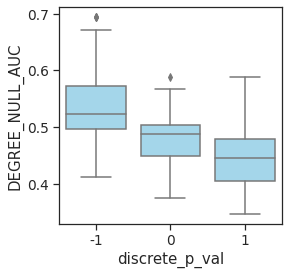

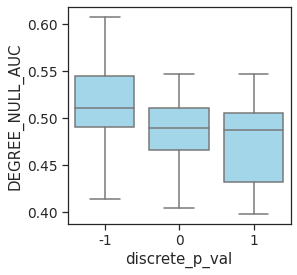

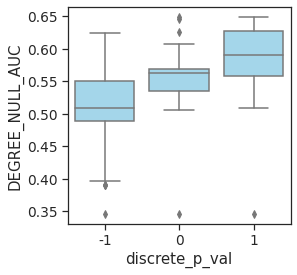

In [404]:
egad_intra = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/hic_gene_intra_KR_egad_intra_only_type2.csv', sep='\t')



egad_inter = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/hic_gene_gw_KR_KR_egad_inter_only.csv', sep='\t')



egad_dist = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/human_dist_egad_intra_only.csv', sep='\t')

auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')
#df_whole = df_whole[df_whole['X.2'] == 'cellular_component']
for df_2d_s in [egad_dist, egad_intra, egad_inter, ]:
    fig, ax = plt.subplots()

    df_2d = df_2d_s.merge(df_whole, left_on='Unnamed: 0', right_on='X')


    df_2d['discrete_p_val'] = [1 if x <=0.05 else -1 if x>=0.95 else 0 for x in df_2d['adjusted_P_val_agg']]
    
    #sns.boxplot(data=df_2d, x='discrete_p_val', y='AUC', color='#98DBF6')
    sns.boxplot(data=df_2d, x='discrete_p_val', y='DEGREE_NULL_AUC', color='#98DBF6')
    #sns.regplot(data=df_2d[df_2d['species']=='human'], y='adjusted_P_val_agg', x='AUC')

    df_2d['AUC_d'] = df_2d['AUC'] * 10
    df_2d['AUC_d'] = df_2d['AUC_d'].astype('int')
    #sns.boxplot(data=df_2d[df_2d['species']=='human'], y='adjusted_P_val_agg', x='AUC_d', color='#98DBF6')
    plt.plot()
    
    df_2d['DEGREE_NULL_AUC_d'] = df_2d['DEGREE_NULL_AUC'] * 10
    df_2d['DEGREE_NULL_AUC_d'] = df_2d['DEGREE_NULL_AUC_d'].astype('int')
    #sns.violinplot(data=df_2d[df_2d['species']=='human'], y='adjusted_P_val_agg', x='DEGREE_NULL_AUC_d', color='#98DBF6')



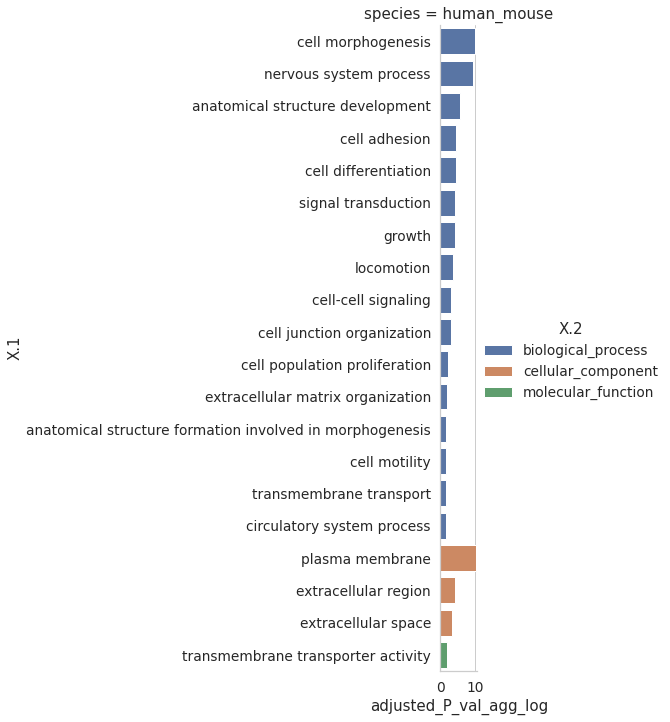

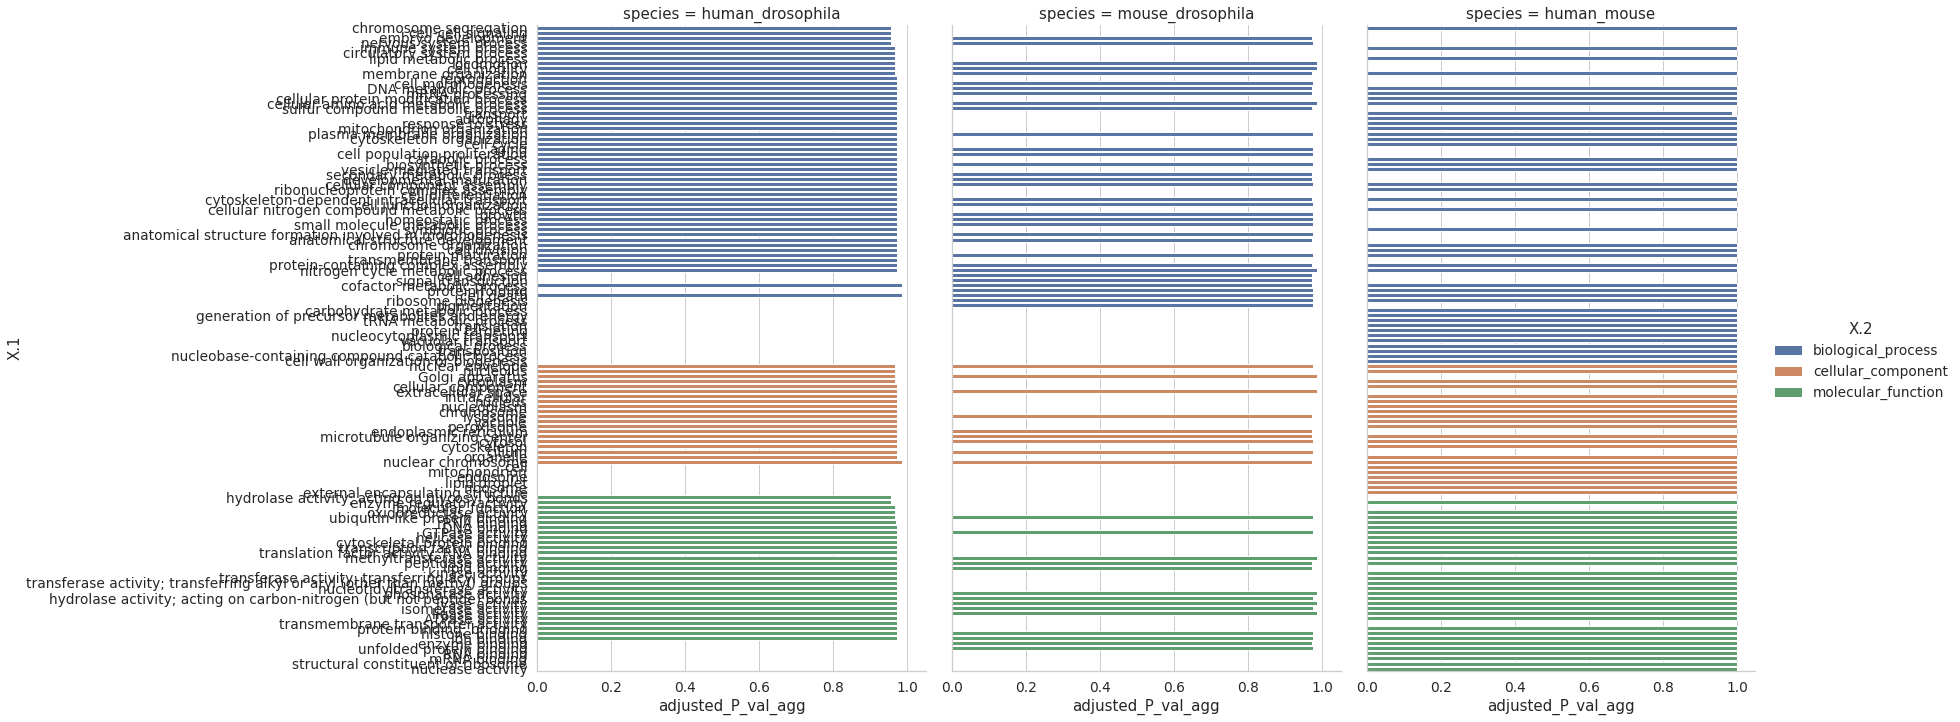

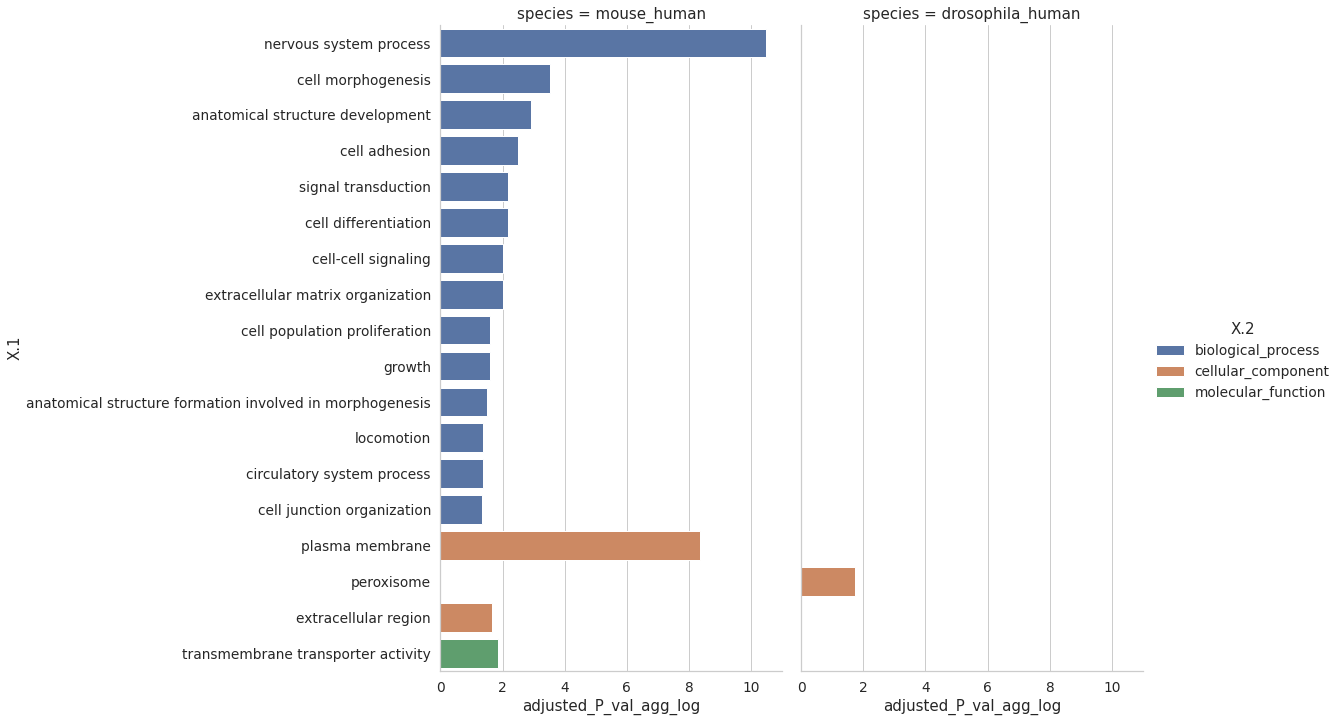

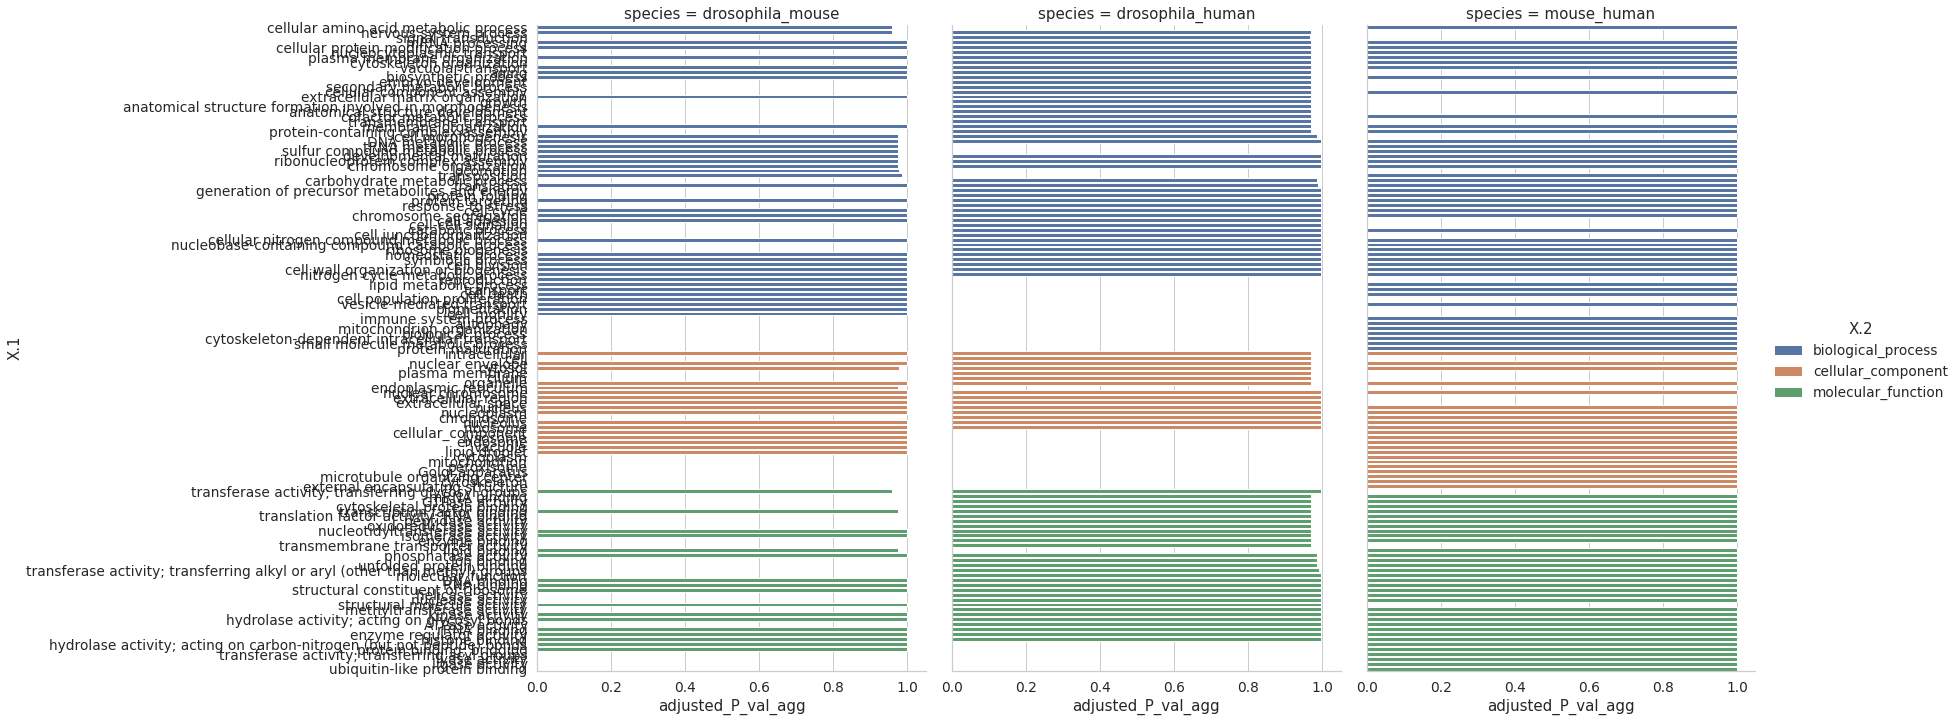

In [974]:
for list_type in [auc_GO_terms_manw_three_list_hic_hic_from_human, auc_GO_terms_manw_three_list_hic_hic]:
    auc_GO_terms_manw = pd.concat(list_type)

    df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')

    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]
    sns.catplot(data=df_whole[df_whole['adjusted_P_val_agg'] <= 0.05].sort_values(['X.2', 'adjusted_P_val_agg']), y='X.1', x='adjusted_P_val_agg_log', hue='X.2', height=10, aspect=8/9.5, kind='bar', dodge=False, col='species')

    sns.catplot(data=df_whole[df_whole['adjusted_P_val_agg'] >= 0.95].sort_values(['X.2', 'adjusted_P_val_agg']), y='X.1', x='adjusted_P_val_agg', hue='X.2', height=10, aspect=8/9.5, kind='bar', dodge=False, col='species')


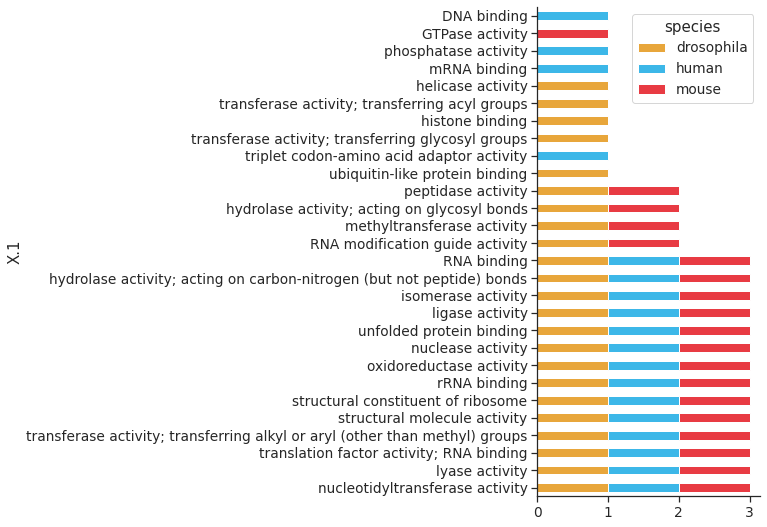

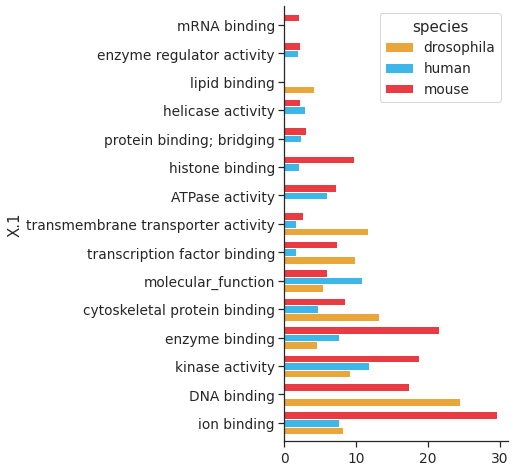

In [426]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp)


df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]
#df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(1-x) for x in df_whole['adjusted_P_val_agg']]




fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.axes_style("white")
sns.set_style("ticks")
#sns.despine()
df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] > 0.95]
df_hic_exp_enrich = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp_enrich.fillna(0, inplace=True)
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] = df_tmp['drosophila'] + df_tmp['human'] + df_tmp['mouse']
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['drosophila', 'human', 'mouse']].plot(kind='barh', stacked=True, figsize=(4, 9), zorder=2, color={"human": "#3CB7E8", "mouse": "#E83B43", "drosophila":"#E8A63B"} , ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
sns.set_style("ticks")

fig, ax = plt.subplots()
df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] < 0.05]
df_hic_exp_enrich = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp_enrich.fillna(0, inplace=True)
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] = df_tmp['drosophila'] + df_tmp['human'] + df_tmp['mouse']
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['drosophila', 'human', 'mouse']].plot(kind='barh', stacked=False, figsize=(4, 8), zorder=2, color={"human": "#3CB7E8", "mouse": "#E83B43", "drosophila":"#E8A63B"} , ax=ax, width=0.8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/hic_coexp_go_depleted.pdf', transparent=True, bbox_inches='tight')




species                                       human_mouse  mouse_drosophila
X.1                                                                        
ATPase activity                                  3.468402          1.377518
DNA binding                                           NaN          2.701043
cytoskeletal protein binding                     1.593308               NaN
enzyme binding                                   3.054254          2.899736
enzyme regulator activity                             NaN          1.445657
helicase activity                                1.409536               NaN
histone binding                                  2.531247          2.899736
hydrolase activity; acting on glycosyl bonds          NaN          1.778029
ion binding                                      5.240269               NaN
kinase activity                                  6.499448               NaN
lipid binding                                         NaN          1.737377


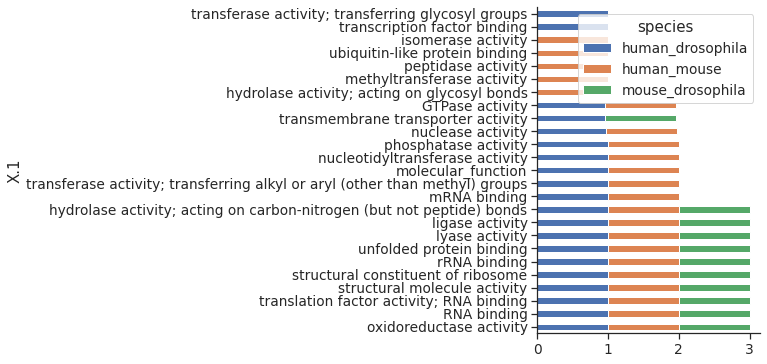

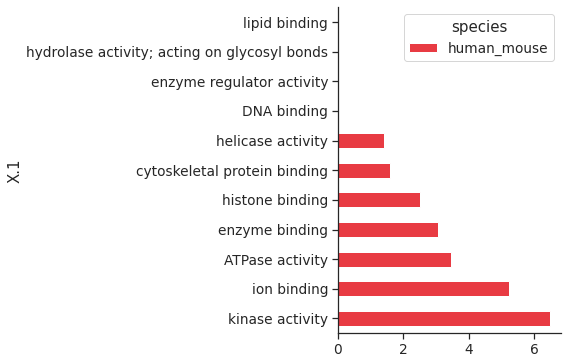

In [428]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp_subset)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] =  df_tmp['human_drosophila'] + df_tmp['human_mouse'] + df_tmp['mouse_drosophila']

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['human_drosophila', 'human_mouse', 'mouse_drosophila']].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2, )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] <= 0.05]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
#df_tmp.fillna(0, inplace=True)

df_tmp['sort_col'] =  df_tmp['human_mouse'] 

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )


ax = df_tmp[['human_mouse' ]].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2, color={ "human_mouse": "#E83B43", "drosophila":"#E8A63B"})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


species                                             mouse_human
X.1                                                            
anatomical structure development                       2.905922
anatomical structure formation involved in morp...     1.483780
cell adhesion                                          2.489339
cell differentiation                                   2.176033
cell junction organization                             1.348783
cell morphogenesis                                     3.525428
cell population proliferation                          1.602089
cell-cell signaling                                    2.015409
circulatory system process                             1.357255
extracellular matrix organization                      2.015409
growth                                                 1.602089
locomotion                                             1.385709
nervous system process                                10.484579
signal transduction                     

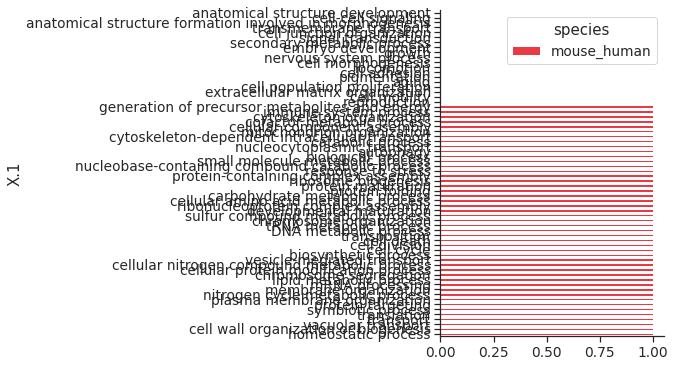

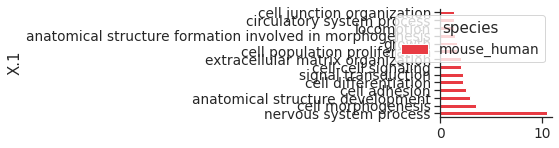

In [427]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_hic)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

df_whole_mp = df_whole[df_whole['X.2'] == 'biological_process']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
#print (df_tmp)
df_tmp['sort_col'] =  df_tmp['mouse_human'] + df_tmp['drosophila_mouse']

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['mouse_human']].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2, color={ "mouse_human": "#E83B43", "drosophila":"#E8A63B"})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df_whole_mp = df_whole[df_whole['X.2'] == 'biological_process']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] <= 0.05]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
#df_tmp.fillna(0, inplace=True)
print (df_tmp)
df_tmp['sort_col'] =  df_tmp['mouse_human'] 

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )


ax = df_tmp[['mouse_human' ]].plot(kind='barh', stacked=True, figsize=(2, 2), zorder=2, color={ "mouse_human": "#E83B43", "drosophila":"#E8A63B"})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [50]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_hic_both_ways)
auc_GO_terms_manw  = auc_GO_terms_manw[auc_GO_terms_manw['species'] != 'mouse_drosophila']
df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_hic_hic = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_hic_hic.fillna(0, inplace=True)


In [52]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_hic_exp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp.fillna(0, inplace=True)

In [54]:
depleted_terms = set(df_hic_exp.index.tolist()).union(set(df_hic_hic.index.tolist())) - set(df_hic_exp.index.tolist()).intersection(set(df_hic_hic.index.tolist()))



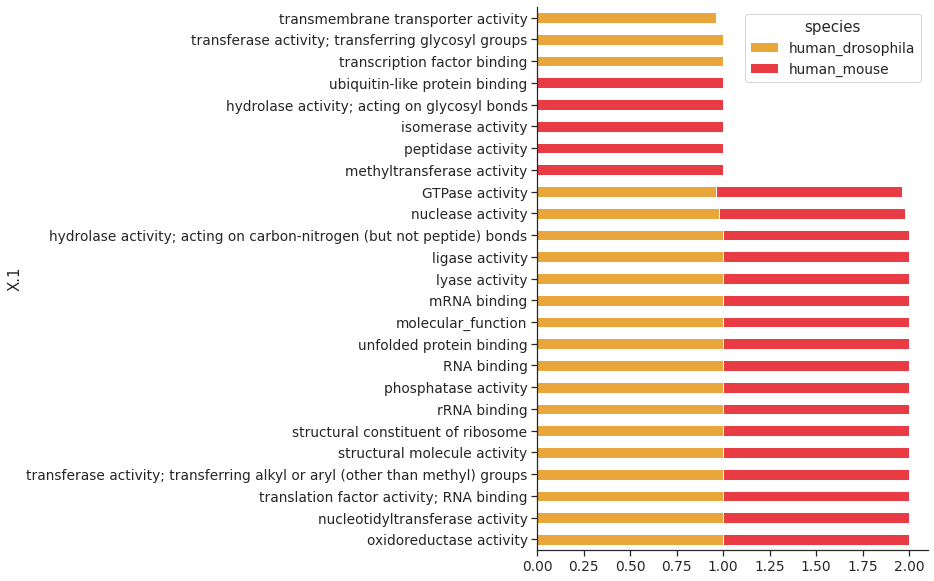

In [172]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp_subset)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_hic_exp_enrich = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp_enrich.fillna(0, inplace=True)

fig, ax = plt.subplots()
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] = df_tmp['human_drosophila'] + df_tmp['human_mouse'] 
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['human_drosophila', 'human_mouse']].plot(kind='barh', stacked=True, figsize=(7, 10), zorder=2, color={"human_mouse": "#E83B43", "human_drosophila":"#E8A63B"} , ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/hic_hic_human_go_depleted.pdf', transparent=True, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

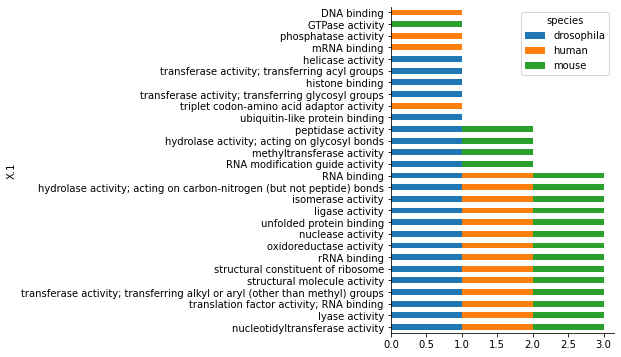

In [95]:
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] = df_tmp['drosophila'] + df_tmp['human'] + df_tmp['mouse']
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['drosophila', 'human', 'mouse']].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

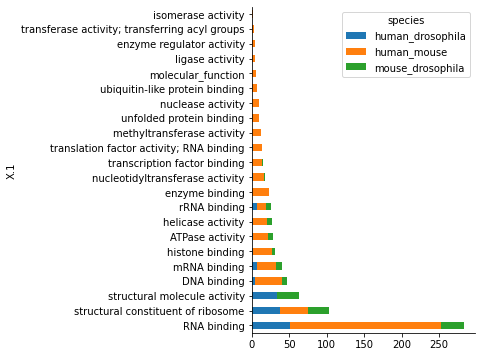

In [32]:
df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] <= 0.05]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] =  df_tmp['human_drosophila'] + df_tmp['human_mouse'] + df_tmp['mouse_drosophila']

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['human_drosophila', 'human_mouse', 'mouse_drosophila']].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



In [890]:
df

fruitfly   sheep fruitfly_OrthoID  sheep_OrthoID
2      FBgn0261285    PPCS    7227_0:002646  9940_0:000004
4      FBgn0085257  SMIM12    7227_0:000d4d  9940_0:000006
5      FBgn0052687  LRRC58    7227_0:003058  9940_0:00000a
6      FBgn0011455  NDUFB5    7227_0:001a44  9940_0:00000b
9      FBgn0262117   INTS3    7227_0:000a29  9940_0:00000d
...            ...     ...              ...            ...
36398  FBgn0010399   GRIN1    7227_0:001fd3  9940_0:004ee5
36812  FBgn0035335  MRPL23    7227_0:0015e5  9940_0:004f9a
36816  FBgn0067628  TAMM41    7227_0:002454  9940_0:004fa4
36930  FBgn0285948  RPL27A    7227_0:00021d  9940_0:004fd5
37016  FBgn0001491   BUD31    7227_0:0030a8  9940_0:005090

[2331 rows x 4 columns]

In [891]:
exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/sheep_prioAggNet_minimal.h5')

In [893]:
df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]

fruitfly   sheep fruitfly_OrthoID  sheep_OrthoID
2      FBgn0261285    PPCS    7227_0:002646  9940_0:000004
4      FBgn0085257  SMIM12    7227_0:000d4d  9940_0:000006
5      FBgn0052687  LRRC58    7227_0:003058  9940_0:00000a
6      FBgn0011455  NDUFB5    7227_0:001a44  9940_0:00000b
9      FBgn0262117   INTS3    7227_0:000a29  9940_0:00000d
...            ...     ...              ...            ...
36398  FBgn0010399   GRIN1    7227_0:001fd3  9940_0:004ee5
36812  FBgn0035335  MRPL23    7227_0:0015e5  9940_0:004f9a
36816  FBgn0067628  TAMM41    7227_0:002454  9940_0:004fa4
36930  FBgn0285948  RPL27A    7227_0:00021d  9940_0:004fd5
37016  FBgn0001491   BUD31    7227_0:0030a8  9940_0:005090

[2268 rows x 4 columns]

In [ ]:
import os.path

for outer_subset in ['human', 'mouse', 'fruitfly']:
    for species_subset_list, f_name in zip( [ mya_ben[mya_ben['class'] == 'Mammalia']['saved_name'].tolist(), mya_ben[mya_ben['phylum'] == 'Chordata']['saved_name'].tolist(), mya_ben[mya_ben['kingdom'] == 'Metazoa']['saved_name'].tolist(), mya_ben[mya_ben['class'] == 'Insecta']['saved_name'].tolist(), mya_ben[(mya_ben['phylum'] == 'Chordata') | (mya_ben['phylum'] == 'Arthropoda') ]['saved_name'].tolist()], ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']):
        empty_list = []
        counter = 0
        for  species_subset in species_subset_list:
            
            
            if species_subset != outer_subset:
            
                if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                    counter = counter + 1
            
                    try:

                        ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]

                        empty_list.append(df)
                    except:


                        ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]
                        empty_list.append(df)

        df = pd.concat(empty_list)
        df['count'] = 1

        df_gene_freq = df.groupby([outer_subset])['count'].sum().reset_index()
        df_gene_freq[df_gene_freq['count']>=counter].to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp', index=False)


In [910]:
import os.path

for outer_subset in ['fruitfly']:
    for species_subset_list, f_name in zip( [ mya_ben[mya_ben['class'] == 'Mammalia']['saved_name'].tolist(), mya_ben[mya_ben['phylum'] == 'Chordata']['saved_name'].tolist(), mya_ben[mya_ben['kingdom'] == 'Metazoa']['saved_name'].tolist(), mya_ben[mya_ben['class'] == 'Insecta']['saved_name'].tolist(), mya_ben[(mya_ben['phylum'] == 'Chordata') | (mya_ben['phylum'] == 'Arthropoda') ]['saved_name'].tolist()], ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']):
        empty_list = []
        counter = 0
        for  species_subset in species_subset_list:
            
            
            if species_subet != outer_subset:
            
                if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                    counter = counter + 1
            
                    try:

                        ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]

                        empty_list.append(df)
                    except:


                        ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]
                        empty_list.append(df)

        df = pd.concat(empty_list)
        df['count'] = 1

        df_gene_freq = df.groupby([outer_subset])['count'].sum().reset_index()
        df_gene_freq[df_gene_freq['count']>=counter].to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp', index=False)


In [908]:
l

NameError: name 'l' is not defined

In [938]:

for outer_subset in ['human', 'mouse', 'fruitfly']:
    exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{outer_subset}_prioAggNet_minimal.h5')
    for f_name in ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']:
                    df_subset_genes = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp')
                    df_subset_genes = df_subset_genes[df_subset_genes[outer_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]
                    df_subset_genes.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp', index=False)

In [939]:

for outer_subset in ['human', 'mouse', 'fruitfly']:
    for f_name in ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']:
        empty_list = []
        for  species_subset in mya_ben['saved_name'].tolist():
            if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                if os.path.exists(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp'):
            
                    df_subset_genes = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp')

                    if species_subset != outer_subset:


                        try:

                            ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                            df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                            df = df.drop_duplicates(subset=[species_subset], keep=False)
                            df = df.drop_duplicates(subset=[outer_subset], keep=False)
                            df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                            df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                            
                        except:

                            try:
                                ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                                df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                                df = df.drop_duplicates(subset=[species_subset], keep=False)
                                df = df.drop_duplicates(subset=[outer_subset], keep=False)
                                df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                                df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                            except:
                                pass

                    else:
                        #pass
                        df_subset_genes.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{outer_subset}_{species_subset}_orthoNM.csv', index=False)




In [935]:
pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{outer_subset}_prioAggNet_minimal.h5')


FileNotFoundError: [Errno 2] No such file or directory: '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/fly_prioAggNet_minimal.h5'

In [901]:

for outer_subset in ['human', 'mouse', 'fruitfly']:
    for f_name in ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']:
        empty_list = []
        for  species_subset in mya_ben['saved_name'].tolist():
            if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                #if os.path.exists(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp'):
            
                    df_subset_genes = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp')
                    if species_subset != outer_subset:


                        try:

                            ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                            df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                            df = df.drop_duplicates(subset=[species_subset], keep=False)
                            df = df.drop_duplicates(subset=[outer_subset], keep=False)
                            df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                            #df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                        except:

                            try:
                                ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                                df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                                df = df.drop_duplicates(subset=[species_subset], keep=False)
                                df = df.drop_duplicates(subset=[outer_subset], keep=False)
                                df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                                #df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                            except:
                                print (species_subset)
                                pass

                    else:
                        pass
                        #df_subset_genes.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{outer_subset}_{species_subset}_orthoNM.csv', index=False)




chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam
chlam


In [673]:


dj = df[df['human'].isin(df_gene_freq[df_gene_freq['count']>=(len(ortho_before_yeast)-1)]['human'].tolist())]
    

human  count
336    ENSG00000014123     20
511    ENSG00000036054     20
521    ENSG00000037474     20
535    ENSG00000038532     20
891    ENSG00000065183     20
...                ...    ...
13185  ENSG00000176261     20
14629  ENSG00000185414     20
16041  ENSG00000198836     20
16044  ENSG00000198839     20
16070  ENSG00000198887     20

[81 rows x 2 columns]

KeyError: 'species_2'

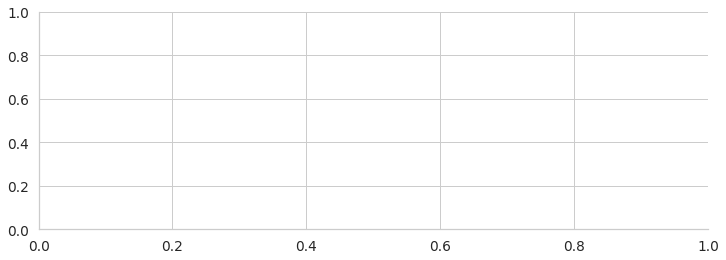

In [707]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=dj[dj['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='count', hue='class', estimator=np.sum, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
            transparent=True, bbox_inches="tight")

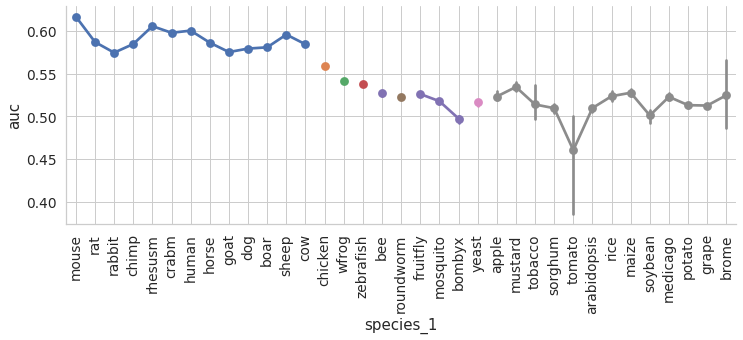

In [510]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='mouse'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
            transparent=True, bbox_inches="tight")

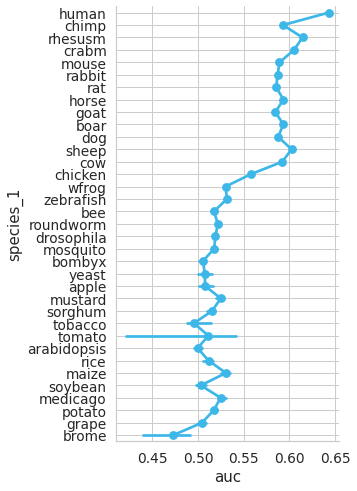

In [334]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 4,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='species_1', x='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
#plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
            transparent=True, bbox_inches="tight")

In [285]:
df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya'])


auc     mya species_1 species_2
13501  0.806953     0.0     human     human
11639  0.742759     0.0     human     human
11640  0.693346     0.0     human     human
11641  0.454429     0.0     human     human
11642  0.630233     0.0     human     human
...         ...     ...       ...       ...
1017   0.406700  1496.0     grape     human
1018   0.525111  1496.0     grape     human
1019   0.414122  1496.0     grape     human
995    0.514747  1496.0     grape     human
181    0.497024  1496.0   tobacco     human

[181734 rows x 4 columns]

In [269]:
df_species_auc.groupby(['species_2', 'mya', 'species_1'])['auc'].sem()

species_2   mya     species_1 
drosophila  0.0     drosophila    0.000672
            272.0   bombyx        0.002478
                    mosquito      0.001065
            325.0   bee           0.001509
            743.0   roundworm     0.001862
                                    ...   
mouse       1496.0  rice          0.003498
                    sorghum       0.003712
                    soybean       0.005556
                    tobacco       0.014984
                    tomato        0.032125
Name: auc, Length: 105, dtype: float64

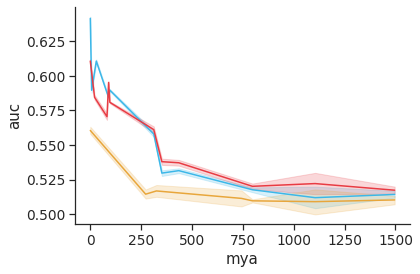

In [254]:
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8', '#E83B43', '#E8A63B'])
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()

#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/all_species_hic_coexp.pdf',
#            transparent=True)

<AxesSubplot:xlabel='mya', ylabel='auc'>

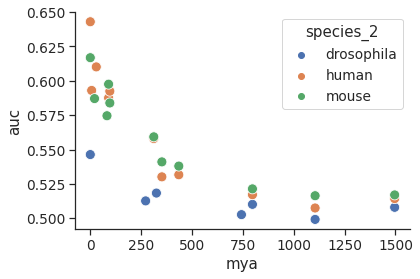

In [411]:
sns.scatterplot(data=df_species_auc.groupby(['species_2', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', s=100, hue='species_2')

In [422]:
df_species_auc.groupby(['species_2', 'mya', 'species_1'])['auc'].median().reset_index().head(40)

species_2      mya    species_1       auc
0   drosophila     0.00   drosophila  0.549104
1   drosophila   272.00       bombyx  0.508876
2   drosophila   272.00     mosquito  0.520781
3   drosophila   325.00          bee  0.522300
4   drosophila   743.00    roundworm  0.512392
5   drosophila   797.00         boar  0.507572
6   drosophila   797.00      chicken  0.511357
7   drosophila   797.00        chimp  0.511726
8   drosophila   797.00          cow  0.513945
9   drosophila   797.00        crabm  0.507498
10  drosophila   797.00          dog  0.508009
11  drosophila   797.00         goat  0.506579
12  drosophila   797.00        horse  0.521166
13  drosophila   797.00        human  0.521981
14  drosophila   797.00        mouse  0.509701
15  drosophila   797.00       rabbit  0.506624
16  drosophila   797.00          rat  0.503902
17  drosophila   797.00      rhesusm  0.503824
18  drosophila   797.00        sheep  0.510790
19  drosophila   797.00        wfrog  0.502179
20  drosophila   797.00    zebrafish  0.503234
21  drosophila  1105.00        yeast  0.497029
22  drosophila  1496.00        apple  0.527778
23  drosophila  1496.00  arabidopsis  0.516854
24  drosophila  1496.00        brome  0.454545
25  drosophila  1496.00        grape  0.493300
26  drosophila  1496.00        maize  0.494932
27  drosophila  1496.00     medicago  0.496927
28  drosophila  1496.00      mustard  0.510638
29  drosophila  1496.00       potato  0.523931
30  drosophila  1496.00         rice  0.487734
31  drosophila  1496.00      sorghum  0.501572
32  drosophila  1496.00      soybean  0.521930
33  drosophila  1496.00      tobacco  0.512821
34  drosophila  1496.00       tomato  0.526316
35       human     0.00        human  0.632138
36       human     6.70        chimp  0.594118
37       human    29.44        crabm  0.611321
38       human    29.44      rhesusm  0.618938
39       human    90.00        mouse  0.594147

In [412]:
df_species_auc

auc     mya    species_1   species_2
0    0.591982  1496.0  arabidopsis       human
1    0.361136  1496.0  arabidopsis       human
2    0.554566  1496.0  arabidopsis       human
3    0.552617  1496.0  arabidopsis       human
4    0.429621  1496.0  arabidopsis       human
..        ...     ...          ...         ...
139  0.259259  1496.0      tobacco  drosophila
140  0.696759  1496.0      tobacco  drosophila
141  0.370370  1496.0      tobacco  drosophila
142  0.395833  1496.0      tobacco  drosophila
143  0.569149  1496.0      tobacco  drosophila

[416624 rows x 4 columns]

<AxesSubplot:xlabel='mya', ylabel='auc'>

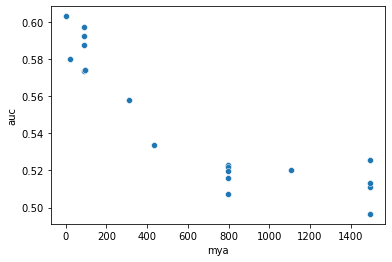

In [272]:
sns.scatterplot(data=mya.sort_values(by=['mya']), x='mya', y='auc')

In [345]:
df_species_auc.dropna(inplace=True)
df_species_auc['mya_decibel'] = [x/100 for x in df_species_auc['mya']]
df_species_auc['mya_decibel'] = [-1 if x==0 else x for x in df_species_auc['mya']]
df_species_auc['mya_decibel'] = df_species_auc['mya_decibel'].astype('int')


<AxesSubplot:xlabel='mya_decibel', ylabel='auc'>

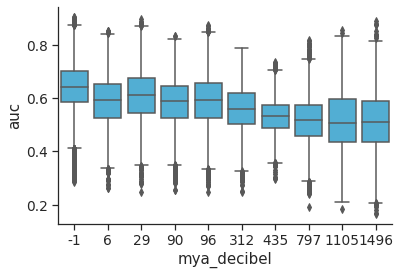

In [347]:
sns.boxplot(data=df_species_auc, x='mya_decibel', y='auc', color='#3CB7E8')

In [348]:
df_species_auc

auc      mya  mya_decibel
0      0.591982  1496.00         1496
1      0.361136  1496.00         1496
2      0.554566  1496.00         1496
3      0.552617  1496.00         1496
4      0.429621  1496.00         1496
...         ...      ...          ...
11893  0.528119    29.44           29
11894  0.474247    29.44           29
11895  0.499959    29.44           29
11896  0.511098    29.44           29
11897  0.552433    29.44           29

[125667 rows x 3 columns]

<AxesSubplot:xlabel='mya', ylabel='auc'>

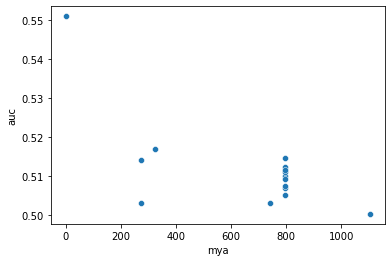

In [293]:
import seaborn as sns
sns.scatterplot(data=mya.sort_values(by=['mya']).head(28), x='mya', y='auc')

In [12]:
ortho_file = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/human_mouse_orthoNM.csv")

In [13]:
ortho_file


human               mouse  human_OrthoID   mouse_OrthoID
0      ENSG00000198712  ENSMUSG00000064354  9606_0:00000a  10090_0:000000
1      ENSG00000198763  ENSMUSG00000064345  9606_0:000002  10090_0:000001
2      ENSG00000198727  ENSMUSG00000064370  9606_0:000006  10090_0:000002
3      ENSG00000198886  ENSMUSG00000064363  9606_0:000005  10090_0:000003
4      ENSG00000198899  ENSMUSG00000064357  9606_0:000003  10090_0:000004
...                ...                 ...            ...             ...
21098  ENSG00000152242  ENSMUSG00000047466  9606_0:004443  10090_0:00598f
21099  ENSG00000152240  ENSMUSG00000041840  9606_0:0044fa  10090_0:005990
21100  ENSG00000147082  ENSMUSG00000051592  9606_0:005016  10090_0:005992
21101  ENSG00000072133  ENSMUSG00000025665  9606_0:0052d4  10090_0:005994
21102  ENSG00000101842  ENSMUSG00000031430  9606_0:005255  10090_0:005996

[21103 rows x 4 columns]

In [16]:
        temp_f = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{species}_human_orthoNM.csv")
        ortho_file.merge(temp_f, left_on='human', right_on='human')

human               mouse human_OrthoID_x   mouse_OrthoID  \
0      ENSG00000198712  ENSMUSG00000064354   9606_0:00000a  10090_0:000000   
1      ENSG00000198763  ENSMUSG00000064345   9606_0:000002  10090_0:000001   
2      ENSG00000198727  ENSMUSG00000064370   9606_0:000006  10090_0:000002   
3      ENSG00000198886  ENSMUSG00000064363   9606_0:000005  10090_0:000003   
4      ENSG00000198899  ENSMUSG00000064357   9606_0:000003  10090_0:000004   
...                ...                 ...             ...             ...   
28910  ENSG00000072133  ENSMUSG00000025665   9606_0:0052d4  10090_0:005994   
28911  ENSG00000072133  ENSMUSG00000025665   9606_0:0052d4  10090_0:005994   
28912  ENSG00000072133  ENSMUSG00000025665   9606_0:0052d4  10090_0:005994   
28913  ENSG00000072133  ENSMUSG00000025665   9606_0:0052d4  10090_0:005994   
28914  ENSG00000101842  ENSMUSG00000031430   9606_0:005255  10090_0:005996   

                  chicken chicken_OrthoID human_OrthoID_y  
0      ENSGALG00000032456   9031_0:004a89   9606_0:00000a  
1      ENSGALG00000043768   9031_0:004a80   9606_0:000002  
2      ENSGALG00000032079   9031_0:004a88   9606_0:000006  
3      ENSGALG00000036229   9031_0:004a87   9606_0:000005  
4      ENSGALG00000041091   9031_0:004a84   9606_0:000003  
...                   ...             ...             ...  
28910  ENSGALG00000007097   9031_0:0014a2   9606_0:0052d4  
28911  ENSGALG00000011473   9031_0:0012f4   9606_0:0052d4  
28912  ENSGALG00000016406   9031_0:000251   9606_0:0052d4  
28913  ENSGALG00000037136   9031_0:00381f   9606_0:0052d4  
28914  ENSGALG00000008290   9031_0:0016ce   9606_0:005255  

[28915 rows x 7 columns]

In [18]:
import pandas as pd
ortho_file = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/human_mouse_orthoNM.csv")
ortho_file  = ortho_file.drop_duplicates(subset=['human'], keep=False)
ortho_file  = ortho_file.drop_duplicates(subset=['mouse'], keep=False)
for species in ["boar","chicken","cow","fruitfly","rat","roundworm","yeast","zebrafish"]:

#for species in ["boar"]:
    try:
        #del ortho_file['human_OrthoID']
        temp_f = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/human_{species}_orthoNM.csv")
        temp_f  = temp_f.drop_duplicates(subset=['human'], keep=False)
        temp_f  = temp_f.drop_duplicates(subset=[species], keep=False)
        ortho_file = ortho_file.merge(temp_f, left_on='human', right_on='human')
        #print (ortho_file)
        

    except:
        #del ortho_file['human_OrthoID']
        temp_f = pd.read_csv(f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{species}_human_orthoNM.csv")
        temp_f  = temp_f.drop_duplicates(subset=['human'], keep=False)
        temp_f  = temp_f.drop_duplicates(subset=[species], keep=False)
        ortho_file = ortho_file.merge(temp_f, left_on='human', right_on='human')
        #print (ortho_file)
        

human               mouse human_OrthoID_x   mouse_OrthoID  \
0    ENSG00000117222  ENSMUSG00000026439   9606_0:00004c  10090_0:000015   
1    ENSG00000135972  ENSMUSG00000060679   9606_0:000ad4  10090_0:000035   
2    ENSG00000119537  ENSMUSG00000009905   9606_0:004411  10090_0:00003f   
3    ENSG00000247626  ENSMUSG00000046994   9606_0:000d41  10090_0:000046   
4    ENSG00000117593  ENSMUSG00000026709   9606_0:00071d  10090_0:000052   
..               ...                 ...             ...             ...   
302  ENSG00000001497  ENSMUSG00000057421   9606_0:00506d  10090_0:005385   
303  ENSG00000181704  ENSMUSG00000047694   9606_0:0050dc  10090_0:00542c   
304  ENSG00000165195  ENSMUSG00000031381   9606_0:00523d  10090_0:0055a5   
305  ENSG00000180182  ENSMUSG00000064127   9606_0:0051e9  10090_0:005699   
306  ENSG00000149089  ENSMUSG00000010911   9606_0:002f69  10090_0:005834   

                   boar human_OrthoID_y   boar_OrthoID             chicken  \
0    ENSSSCG00000015288   9606_0:00004c  9823_0:002deb  ENSGALG00000000668   
1    ENSSSCG00000028020   9606_0:000ad4  9823_0:000eec  ENSGALG00000016794   
2    ENSSSCG00000025744   9606_0:004411  9823_0:0004c2  ENSGALG00000012882   
3    ENSSSCG00000034494   9606_0:000d41  9823_0:00414b  ENSGALG00000004019   
4    ENSSSCG00000015492   9606_0:00071d  9823_0:002f99  ENSGALG00000023749   
..                  ...             ...            ...                 ...   
302  ENSSSCG00000012366   9606_0:00506d  9823_0:004be4  ENSGALG00000043447   
303  ENSSSCG00000028336   9606_0:0050dc  9823_0:004983  ENSGALG00000035973   
304  ENSSSCG00000012134   9606_0:00523d  9823_0:004b67  ENSGALG00000016559   
305  ENSSSCG00000012250   9606_0:0051e9  9823_0:004bd6  ENSGALG00000016238   
306  ENSSSCG00000013299   9606_0:002f69  9823_0:000bfe  ENSGALG00000031286   

    chicken_OrthoID human_OrthoID_x  ...     rat_OrthoID       roundworm  \
0     9031_0:003b16   9606_0:00004c  ...  10116_0:004364  WBGene00017683   
1     9031_0:0004c8   9606_0:000ad4  ...  10116_0:0034d2  WBGene00017319   
2     9031_0:000ac5   9606_0:004411  ...  10116_0:004360  WBGene00021367   
3     9031_0:0014ff   9606_0:000d41  ...  10116_0:0033ba  WBGene00013678   
4     9031_0:002379   9606_0:00071d  ...  10116_0:0043cd  WBGene00001095   
..              ...             ...  ...             ...             ...   
302   9031_0:0014d0   9606_0:00506d  ...  10116_0:00587c  WBGene00012393   
303   9031_0:00171a   9606_0:0050dc  ...  10116_0:0056c2  WBGene00012208   
304   9031_0:000549   9606_0:00523d  ...  10116_0:0056c4  WBGene00008431   
305   9031_0:0001f9   9606_0:0051e9  ...  10116_0:00567e  WBGene00004343   
306   9031_0:001acb   9606_0:002f69  ...  10116_0:0012a6  WBGene00013870   

    roundworm_OrthoID human_OrthoID_x    yeast human_OrthoID_y  \
0       6239_0:001705   9606_0:00004c  YAR003W   9606_0:00004c   
1       6239_0:001978   9606_0:000ad4  YBR146W   9606_0:000ad4   
2       6239_0:003091   9606_0:004411  YBR265W   9606_0:004411   
3       6239_0:00046e   9606_0:000d41  YGR171C   9606_0:000d41   
4       6239_0:003558   9606_0:00071d  YPL104W   9606_0:00071d   
..                ...             ...      ...             ...   
302     6239_0:00040c   9606_0:00506d  YKR063C   9606_0:00506d   
303     6239_0:0007f2   9606_0:0050dc  YGL198W   9606_0:0050dc   
304     6239_0:001064   9606_0:00523d  YPL175W   9606_0:00523d   
305     6239_0:001dc3   9606_0:0051e9  YLR071C   9606_0:0051e9   
306     6239_0:004c80   9606_0:002f69  YJR024C   9606_0:002f69   

        yeast_OrthoID           zebrafish zebrafish_OrthoID  human_OrthoID  
0    1294385_1:00000a  ENSDARG00000042147     7955_0:005927  9606_0:00004c  
1    1294385_1:000089  ENSDARG00000061505     7955_0:001b4e  9606_0:000ad4  
2    1294385_1:0000d1  ENSDARG00000012021     7955_0:0007c4  9606_0:004411  
3    1294385_1:000756  ENSDARG00000009218     7955_0:00718f  9606_0:000d41  
4    1294385_1:0014f7  ENSDARG00000060861     7955_0:0006fc  9606_0:00071d

In [1311]:
mya.sort_values(by=['mya']).head(28)

species      mya       auc
5        human     0.00  0.632311
17       chimp     6.70       NaN
18       crabm    29.44       NaN
27     rhesusm    29.44       NaN
26      rabbit    90.00       NaN
7        mouse    90.00  0.582810
8          rat    90.00  0.579171
19         dog    96.00       NaN
22       horse    96.00       NaN
20        goat    96.00       NaN
28       sheep    96.00       NaN
1         boar    96.00  0.587677
3          cow    96.00  0.584118
2      chicken   312.00  0.557146
36       afrog   351.80       NaN
31       wfrog   351.80       NaN
32      salmon   435.00       NaN
13   zebrafish   435.00  0.529386
33       trout   435.00       NaN
24    mosquito   797.00       NaN
14         bee   797.00       NaN
4   drosophila   797.00  0.515992
15      bombyx   797.00       NaN
10   roundworm   797.00  0.522297
12       yeast  1105.00  0.510366
30      tomato  1496.00       NaN
35       chlam  1496.00       NaN
29     sorghum  1496.00       NaN

In [1167]:
file_path_1 = "/grid/gillis/data/lohia/hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_human_aggregates.csv"

auc_values_1 = pd.read_csv(file_path_1, sep='\t')



In [1168]:
auc_values_1['auc'].median()

0.6716702853947817

<AxesSubplot:xlabel='auc', ylabel='Count'>

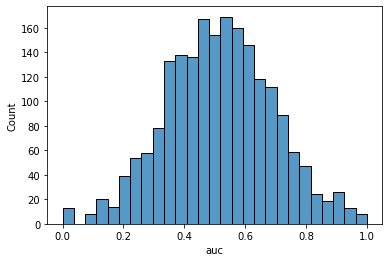

In [1065]:
sns.histplot(auc_values_1['auc'])

In [584]:
dt = pd.melt(df, id_vars=['auc', 'species'], value_vars=['auc_y'])

In [557]:
dt

auc     species variable     value
0        7  Drosophila    auc_y  0.557963
1        7  Drosophila    auc_y  0.531762
2        7  Drosophila    auc_y  0.537148
3        7  Drosophila    auc_y  0.448091
4        6  Drosophila    auc_y  0.526814
...    ...         ...      ...       ...
13658    8       Mouse    auc_y  0.877879
13659    6       Mouse    auc_y  0.731437
13660    8       Mouse    auc_y  0.790765
13661    8       Mouse    auc_y  0.815709
13662    6       Mouse    auc_y  0.630904

[13663 rows x 4 columns]

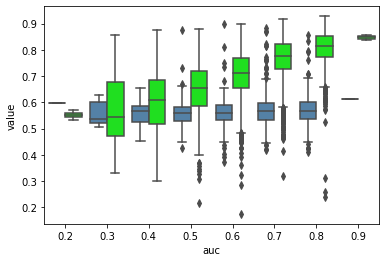

In [585]:
import matplotlib.pyplot as plt
palette ={'Drosophila': 'steelblue', 'Mouse': 'lime'}
g = sns.boxplot(data=dt, x='auc', y='value', hue='species', palette=palette)
g.get_legend().remove()
plt.savefig('save_as_a_png.pdf')

In [732]:
!wget -O /grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot_human.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "TSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Filter name = "biotype" value = "protein_coding"/><Attribute name = "ensembl_gene_id" /><Attribute name = "uniprotswissprot" /></Dataset></Query>'



--2021-10-07 11:27:16--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22TSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CFilter%20name%20=%20%22biotype%22%20value%20=%20%22protein_coding%22/%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22uniprotswissprot%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot_human.txt’

/grid/gillis/data/l     [        <=>   

In [733]:

!wget -O /grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot_mouse.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "TSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "mmusculus_gene_ensembl" interface = "default" ><Filter name = "biotype" value = "protein_coding"/><Attribute name = "ensembl_gene_id" /><Attribute name = "uniprotswissprot" /></Dataset></Query>'



--2021-10-07 11:27:54--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22TSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22mmusculus_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CFilter%20name%20=%20%22biotype%22%20value%20=%20%22protein_coding%22/%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22uniprotswissprot%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot_mouse.txt’

/grid/gillis/data/l     [             

In [734]:
!wget -O /grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot_drosophila.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "TSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "dmelanogaster_gene_ensembl" interface = "default" ><Filter name = "biotype" value = "protein_coding"/><Attribute name = "ensembl_gene_id" /><Attribute name = "uniprotswissprot" /></Dataset></Query>'


--2021-10-07 11:29:24--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22TSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22dmelanogaster_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CFilter%20name%20=%20%22biotype%22%20value%20=%20%22protein_coding%22/%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22uniprotswissprot%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot_drosophila.txt’

/grid/gillis/data/l     [    

In [745]:
file_path_1 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_drosophila/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv"

auc_values_1 = pd.read_csv(file_path_1, sep='\t')

In [740]:
auc_values_1

gene_id_jac_sim chrom_jac_sim    gene_id_exp_file chrom_exp_file  \
0      ENSMUSG00000103477          chr3  ENSMUSG00000103477           chr3   
1      ENSMUSG00000029832          chr6  ENSMUSG00000029832           chr6   
2      ENSMUSG00000081992          chr2  ENSMUSG00000081992           chr2   
3      ENSMUSG00000057346         chr15  ENSMUSG00000057346          chr15   
4      ENSMUSG00000020878         chr11  ENSMUSG00000020878          chr11   
...                   ...           ...                 ...            ...   
20667  ENSMUSG00000107788          chr6  ENSMUSG00000107788           chr6   
20668  ENSMUSG00000032575          chr9  ENSMUSG00000032575           chr9   
20669  ENSMUSG00000031467          chr8  ENSMUSG00000031467           chr8   
20670  ENSMUSG00000111246          chr9  ENSMUSG00000111246           chr9   
20671  ENSMUSG00000049516          chr7  ENSMUSG00000049516           chr7   

            auc  
0      0.707228  
1      0.666488  
2      0.492732  
3      0.453224  
4      0.691066  
...         ...  
20667  0.503431  
20668  0.547396  
20669  0.663980  
20670  0.610514  
20671  0.756647  

[20672 rows x 5 columns]

In [747]:
map_gene_uni = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot_drosophila.txt', sep='\t', names=['gene_id', 'uniprot_id'])

map_gene_uni.dropna(inplace=True)

map_gene_uni.drop_duplicates(inplace=True)

gene_age = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/main_DROME.csv')

uni_list = gene_age['Unnamed: 0'].tolist()

map_gene_uni = map_gene_uni[map_gene_uni['uniprot_id'].isin(uni_list)]

map_gene_uni = map_gene_uni[map_gene_uni['gene_id'].isin(auc_values_1['gene_id_jac_sim'].tolist())]

map_gene_uni.drop_duplicates(subset='uniprot_id', inplace=True)
map_gene_uni.drop_duplicates(subset='gene_id', inplace=True)

df_con_age = map_gene_uni.merge(gene_age, left_on='uniprot_id', right_on='Unnamed: 0')

In [748]:
df_con_age

gene_id uniprot_id Unnamed: 0  Cellular_organisms  Euk_Archaea  \
0     FBgn0015380     Q27324     Q27324            0.000000     0.000000   
1     FBgn0010356     P49846     P49846            0.000000     0.000000   
2     FBgn0034315     Q7K486     Q7K486            0.000000     0.000000   
3     FBgn0000500     P09040     P09040            0.000000     0.000000   
4     FBgn0026324     Q9XZT7     Q9XZT7            0.000000     0.000000   
...           ...        ...        ...                 ...          ...   
2451  FBgn0024230     P25722     P25722            0.000000     0.000000   
2452  FBgn0011726     P45594     P45594            0.000000     0.000000   
2453  FBgn0036974     Q9VPH7     Q9VPH7            0.307692     0.692308   
2454  FBgn0027592     Q9Y149     Q9Y149            0.000000     0.000000   
2455  FBgn0036462     Q9VUJ0     Q9VUJ0            0.272727     0.000000   

      Euk+Bac  Eukaryota  Opisthokonta  Eumetazoa  Protostomia  Ecdysozoa  \
0         0.0   0.125000      0.125000   0.750000          0.0        0.0   
1         0.0   1.000000      0.000000   0.000000          0.0        0.0   
2         0.0   1.000000      0.000000   0.000000          0.0        0.0   
3         0.0   0.000000      0.000000   0.000000          0.0        0.0   
4         0.0   0.846154      0.076923   0.076923          0.0        0.0   
...       ...        ...           ...        ...          ...        ...   
2451      0.0   0.000000      0.500000   0.500000          0.0        0.0   
2452      0.0   0.916667      0.000000   0.000000          0.0        0.0   
2453      0.0   0.000000      0.000000   0.000000          0.0        0.0   
2454      0.0   0.000000      0.000000   0.909091          0.0        0.0   
2455      0.0   0.000000      0.000000   0.727273          0.0        0.0   

      Arthropoda       modeAge  NumDBsContributing  NumDBsFiltered   entropy  \
0       0.000000     Eumetazoa                   8               1  0.735622   
1       0.000000     Eukaryota                  11               2 -0.000000   
2       0.000000     Eukaryota                  13               0 -0.000000   
3       1.000000    Arthropoda                   3               0 -0.000000   
4       0.000000     Eukaryota                  13               0  0.535961   
...          ...           ...                 ...             ...       ...   
2451    0.000000  Opisthokonta                  12               1  0.693147   
2452    0.083333     Eukaryota                  12               0  0.286836   
2453    0.000000   Euk_Archaea                  13               0  0.617242   
2454    0.090909     Eumetazoa                  11               1  0.304636   
2455    0.000000     Eumetazoa                  11               2  0.585953   

           NodeError  Bimodality  HGT_flag  
0      2.44444444444   -0.727273     False  
1     0.692307692308    0.202381     False  
2     0.282051282051    0.007937     False  
3                0.0    0.000000     False  
4      1.41025641026    0.246032     False  
...              ...         ...       ...  
2451   1.46153846154    0.289683     False  
2452   1.80303030303    0.066667     False  
2453  0.461538461538   -0.019841     False  
2454   1.86363636364    0.177778     False  
2455   4.10256410256    0.603175     False  

[2456 rows x 19 columns]

In [750]:
df_uni = auc_values_1.merge(df_con_age, left_on='gene_id_jac_sim', right_on='gene_id')
dict_gene_age = {'Cellular_organisms':0, 'Euk_Archaea':1, 'Euk+Bac':2,'Eukaryota':3, 'Opisthokonta':4, 'Eumetazoa':5, 'Protostomia':6, 'Ecdysozoa':7, 'Arthropoda':8}
df_uni['disc_age'] = [dict_gene_age[x] for x in df_uni['modeAge']]

In [749]:
df_uni = auc_values_1.merge(df_con_age, left_on='gene_id_jac_sim', right_on='gene_id')
dict_gene_age = {'Cellular_organisms':0, 'Euk_Archaea':1, 'Euk+Bac':2,'Eukaryota':3, 'Opisthokonta':4, 'Eumetazoa':5, 'Vertebrata':6, 'Mammalia':7}
df_uni['disc_age'] = [dict_gene_age[x] for x in df_uni['modeAge']]

KeyError: 'Arthropoda'

In [600]:
df

drosophila            human fruitfly_OrthoID  human_OrthoID  \
0      FBgn0037894  ENSG00000198700    7227_0:00229f  9606_0:00000d   
1      FBgn0032321  ENSG00000163159    7227_0:000584  9606_0:00001d   
2      FBgn0038877  ENSG00000203705    7227_0:00272d  9606_0:000026   
3      FBgn0035484  ENSG00000172456    7227_0:001691  9606_0:000049   
4      FBgn0036973  ENSG00000117222    7227_0:001de4  9606_0:00004c   
...            ...              ...              ...            ...   
11822          NaN  ENSG00000099308              NaN  9606_0:00481f   
11823          NaN  ENSG00000120256              NaN  9606_0:001b40   
11824          NaN  ENSG00000164930              NaN  9606_0:0024b2   
11825          NaN  ENSG00000152242              NaN  9606_0:004443   
11826          NaN  ENSG00000152240              NaN  9606_0:0044fa   

        gene_id_jac_sim_x chrom_jac_sim_x  gene_id_exp_file_x  \
0         ENSG00000198700            chr1     ENSG00000198700   
1         ENSG00000163159            chr1     ENSG00000163159   
2         ENSG00000203705            chr1     ENSG00000203705   
3         ENSG00000172456            chr1     ENSG00000172456   
4         ENSG00000117222            chr1     ENSG00000117222   
...                   ...             ...                 ...   
11822  ENSMUSG00000031833            chr8  ENSMUSG00000031833   
11823  ENSMUSG00000019796           chr10  ENSMUSG00000019796   
11824  ENSMUSG00000022297           chr15  ENSMUSG00000022297   
11825  ENSMUSG00000047466           chr18  ENSMUSG00000047466   
11826  ENSMUSG00000041840           chr18  ENSMUSG00000041840   

      chrom_exp_file_x     auc_x gene_id_jac_sim_y chrom_jac_sim_y  \
0                 chr1  0.759784       FBgn0037894           chr3R   
1                 chr1  0.770173       FBgn0032321           chr2L   
2                 chr1  0.733250       FBgn0038877           chr3R   
3                 chr1  0.791577       FBgn0035484           chr3L   
4                 chr1  0.677485       FBgn0036973           chr3L   
...                ...       ...               ...             ...   
11822             chr8  0.816745   ENSG00000099308           chr19   
11823            chr10  0.670122   ENSG00000120256            chr6   
11824            chr15  0.809165   ENSG00000164930            chr8   
11825            chr18  0.818646   ENSG00000152242           chr18   
11826            chr18  0.666731   ENSG00000152240           chr18   

      gene_id_exp_file_y chrom_exp_file_y     auc_y     species  auc  \
0            FBgn0037894            chr3R  0.557963  Drosophila  0.7   
1            FBgn0032321            chr2L  0.531762  Drosophila  0.7   
2            FBgn0038877            chr3R  0.537148  Drosophila  0.7   
3            FBgn0035484            chr3L  0.448091  Drosophila  0.7   
4            FBgn0036973            chr3L  0.526814  Drosophila  0.6   
...                  ...              ...       ...         ...  ...   
11822    ENSG00000099308            chr19  0.877879       Mouse  0.8   
11823    ENSG00000120256             chr6  0.731437       Mouse  0.6   
11824    ENSG00000164930             chr8  0.790765       Mouse  0.8   
11825    ENSG00000152242            chr18  0.815709       Mouse  0.8   
11826    ENSG00000152240            chr18  0.630904       Mouse  0.6   

                    mouse   mouse_OrthoID  
0                     NaN             NaN  
1                     NaN             NaN  
2                     NaN             NaN  
3                     NaN             NaN  
4                     NaN             NaN  
...                   ...             ...  
11822  ENSMUSG00000031833  10090_0:00597c  
11823  ENSMUSG00000019796  10090_0:00597d  
11824  ENSMUSG00000022297  10090_0:005989  
11825  ENSMUSG00000047466  10090_0:00598f  
11826  ENSMUSG00000041840  10090_0:005990  

[13663 rows x 18 columns]

In [1192]:
df = pd.read_csv("/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/intra_only/coexp_intra_10_percent_per_chr_drosophila_aggregates_with_coexp.csv", sep= '\t')

In [1193]:
df['auc'].mean()

0.6403464747689831

In [725]:
df_uni

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file  \
0      ENSG00000186567         chr19  ENSG00000186567          chr19   
1      ENSG00000132763          chr1  ENSG00000132763           chr1   
2      ENSG00000113391          chr5  ENSG00000113391           chr5   
3      ENSG00000162669          chr1  ENSG00000162669           chr1   
4      ENSG00000141655         chr18  ENSG00000141655          chr18   
...                ...           ...              ...            ...   
15044  ENSG00000165819         chr14  ENSG00000165819          chr14   
15045  ENSG00000172366         chr16  ENSG00000172366          chr16   
15046  ENSG00000162851          chr1  ENSG00000162851           chr1   
15047  ENSG00000171202         chr11  ENSG00000171202          chr11   
15048  ENSG00000122224          chr1  ENSG00000122224           chr1   

            auc          gene_id uniprot_id Unnamed: 0  Cellular_organisms  \
0      0.869680  ENSG00000186567     Q7Z692     Q7Z692            0.000000   
1      0.713762  ENSG00000132763     Q9Y4U1     Q9Y4U1            0.000000   
2      0.763507  ENSG00000113391     Q8WUF8     Q8WUF8            0.000000   
3      0.789173  ENSG00000162669     A2PYH4     A2PYH4            0.111111   
4      0.667872  ENSG00000141655     Q9Y6Q6     Q9Y6Q6            0.000000   
...         ...              ...        ...        ...                 ...   
15044  0.718489  ENSG00000165819     Q86U44     Q86U44            0.000000   
15045  0.884773  ENSG00000172366     Q9BUT9     Q9BUT9            0.000000   
15046  0.757451  ENSG00000162851     Q9H5Q4     Q9H5Q4            0.076923   
15047  0.791401  ENSG00000171202     Q9H061     Q9H061            0.000000   
15048  0.668769  ENSG00000122224     Q9HBG7     Q9HBG7            0.000000   

       Euk_Archaea  ...  Vertebrata  Mammalia      modeAge  \
0         0.000000  ...    0.083333  0.833333     Mammalia   
1         0.000000  ...    0.000000  0.000000    Eumetazoa   
2         0.000000  ...    0.000000  0.000000    Eukaryota   
3         0.444444  ...    0.000000  0.000000  Euk_Archaea   
4         0.000000  ...    0.333333  0.250000   Vertebrata   
...            ...  ...         ...       ...          ...   
15044     0.000000  ...    0.000000  0.000000    Eukaryota   
15045     0.000000  ...    0.500000  0.000000    Eumetazoa   
15046     0.000000  ...    0.000000  0.000000    Eumetazoa   
15047     0.000000  ...    0.230769  0.000000    Eumetazoa   
15048     0.000000  ...    0.000000  0.000000    Eumetazoa   

       NumDBsContributing  NumDBsFiltered   entropy       NodeError  \
0                      12               0  0.566086   1.54545454545   
1                      12               1 -0.000000  0.461538461538   
2                      13               0  0.271189   1.48717948718   
3                       9               3  1.214890   3.86363636364   
4                      12               1  1.357978   4.61538461538   
...                   ...             ...       ...             ...   
15044                  13               0  0.271189    1.4358974359   
15045                  12               1  0.693147   1.69230769231   
15046                  13               0  0.793730   2.23076923077   
15047                  13               0  0.540204   1.23076923077   
15048                   3              10 -0.000000   3.92307692308   

       Bimodality  HGT_flag  disc_age  
0        0.266667     False         7  
1       -0.071429     False         5  
2        0.543651     False         3  
3        0.177778     False         1  
4        1.658730     False         6  
...           ...       ...       ...  
15044    0.138889     False         3  
15045    0.047619     False         5  
15046   -0.035714     False         5  
15047    0.480159     False         5  
15048    1.972222     False         5  

[15049 rows x 24 columns]

<AxesSubplot:xlabel='modeAge', ylabel='auc'>

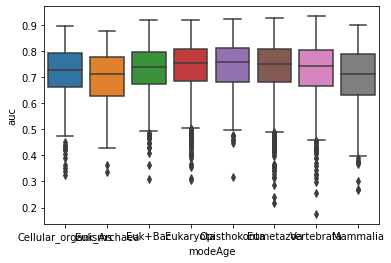

In [729]:
sns.boxplot(data=df_uni, x='modeAge', y='auc', order=['Cellular_organisms', 'Euk_Archaea', 'Euk+Bac','Eukaryota', 'Opisthokonta', 'Eumetazoa', 'Vertebrata', 'Mammalia'])



<AxesSubplot:xlabel='disc_age', ylabel='auc'>

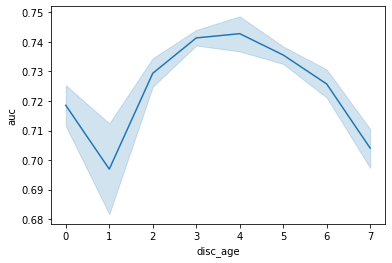

In [735]:
sns.lineplot(data=df_uni, x='disc_age', y='auc', estimator=np.mean,)

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

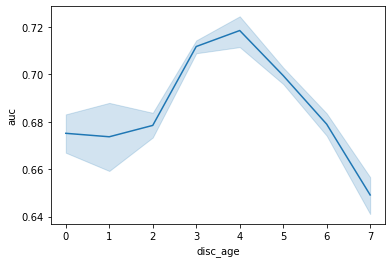

In [744]:
sns.lineplot(data=df_uni, x='disc_age', y='auc', estimator=np.mean,)

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

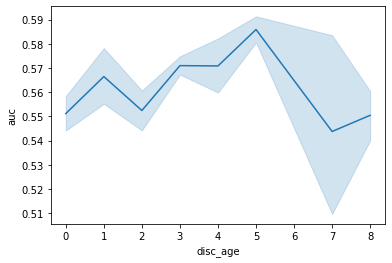

In [751]:
sns.lineplot(data=df_uni, x='disc_age', y='auc', estimator=np.mean,)

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

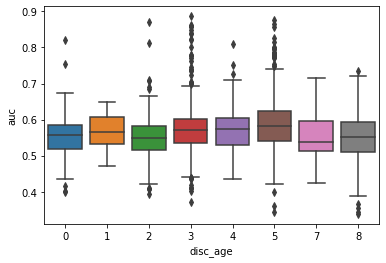

In [752]:
sns.boxplot(data=df_uni, x='disc_age', y='auc')

<AxesSubplot:xlabel='disc_age', ylabel='auc_y'>

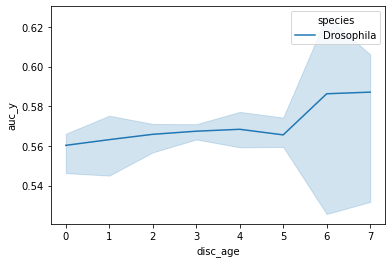

In [615]:
sns.lineplot(data=df_uni[df_uni['species']=='Drosophila'], x='disc_age', y='auc_y', estimator=np.median, hue='species')

<AxesSubplot:xlabel='auc_y', ylabel='Count'>

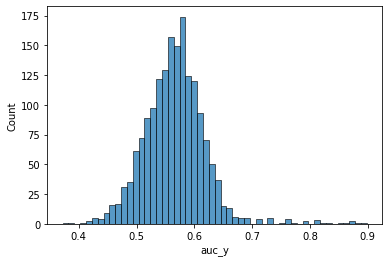

In [618]:
sns.histplot(df_uni[df_uni['species']=='Drosophila']['auc_y'])

<AxesSubplot:xlabel='modeAge', ylabel='auc'>

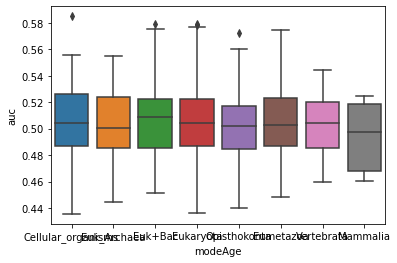

In [352]:
sns.boxplot(data=df_con_age, x='modeAge', y='auc', order=['Cellular_organisms', 'Euk_Archaea', 'Euk+Bac','Eukaryota', 'Opisthokonta', 'Eumetazoa', 'Vertebrata', 'Mammalia'])


<AxesSubplot:xlabel='disc_age', ylabel='auc'>

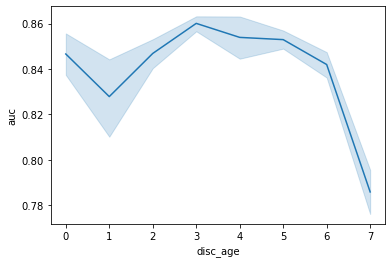

In [372]:
sns.lineplot(data=df_con_age, x='disc_age', y='auc', estimator=np.mean)

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

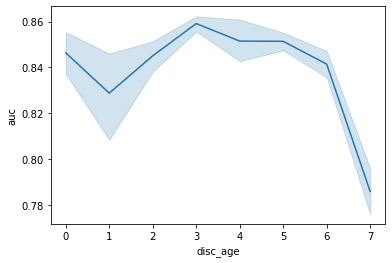

In [410]:
sns.lineplot(data=df_con_age, x='disc_age', y='auc', estimator=np.mean)

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

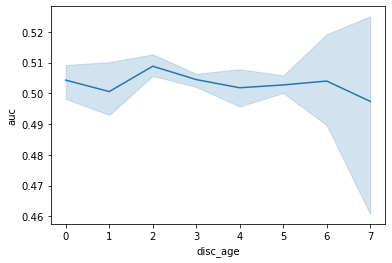

In [356]:
sns.lineplot(data=df_con_age, x='disc_age', y='auc', estimator=np.median)

In [620]:
df_struct_conservation = []
path='/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all'
df_h_m=pd.read_csv(f'{path}/hic_gene_corr_gw_10_percent_per_chr_mouse_aggregates.csv', sep='\t')
path='/grid/gillis/data/lohia/hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all'
df_m_h=pd.read_csv(f'{path}/hic_gene_corr_gw_10_percent_per_chr_human_aggregates.csv', sep='\t')
df = df_h_m.merge(df_m_h, left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
df['auc'] = (df['auc_x'] + df['auc_y'])/2
df['species'] = 'Mouse'
df_struct_conservation.append(df)
path='/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all'
df_h_m=pd.read_csv(f'{path}/hic_gene_corr_gw_10_percent_per_chr_drosophila_aggregates.csv', sep='\t')
path='/grid/gillis/data/lohia/hi_c_data_processing/data_drosophila/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all'
df_m_h=pd.read_csv(f'{path}/hic_gene_corr_gw_10_percent_per_chr_human_aggregates.csv', sep='\t')
df = df_h_m.merge(df_m_h, left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
df['auc'] = (df['auc_x'] + df['auc_y'])/2
df['species'] = 'Drosophila'
df_struct_conservation.append(df)


In [622]:
df_struct_conservation_df = pd.concat(df_struct_conservation)

In [623]:
df_struct_conservation_df 

gene_id_jac_sim_x chrom_jac_sim_x  gene_id_exp_file_x chrom_exp_file_x  \
0      ENSG00000116218            chr1  ENSMUSG00000026602             chr1   
1      ENSG00000158874            chr1  ENSMUSG00000005681             chr1   
2      ENSG00000143178            chr1  ENSMUSG00000026572             chr1   
3      ENSG00000143207            chr1  ENSMUSG00000040782             chr1   
4      ENSG00000171450            chr2  ENSMUSG00000090071             chr1   
...                ...             ...                 ...              ...   
1946   ENSG00000106028            chr7         FBgn0010438            chr3R   
1947   ENSG00000174231           chr17         FBgn0033688            chr2R   
1948   ENSG00000088038           chr19         FBgn0033029            chr2R   
1949   ENSG00000204438            chr6         FBgn0034008            chr2R   
1950   ENSG00000204569            chr6         FBgn0053526            chr2L   

         auc_x   gene_id_jac_sim_y chrom_jac_sim_y gene_id_exp_file_y  \
0     0.554071  ENSMUSG00000026602            chr1    ENSG00000116218   
1     0.879809  ENSMUSG00000005681            chr1    ENSG00000158874   
2     0.846485  ENSMUSG00000026572            chr1    ENSG00000143178   
3     0.969942  ENSMUSG00000040782            chr1    ENSG00000143207   
4     0.797589  ENSMUSG00000090071            chr1    ENSG00000171450   
...        ...                 ...             ...                ...   
1946  0.502173         FBgn0010438           chr3R    ENSG00000106028   
1947  0.509055         FBgn0033688           chr2R    ENSG00000174231   
1948  0.495142         FBgn0033029           chr2R    ENSG00000088038   
1949  0.491338         FBgn0034008           chr2R    ENSG00000204438   
1950  0.494886         FBgn0053526           chr2L    ENSG00000204569   

     chrom_exp_file_y     auc_y       auc     species  
0                chr1  0.340900  0.447485       Mouse  
1                chr1  0.880627  0.880218       Mouse  
2                chr1  0.837744  0.842114       Mouse  
3                chr1  0.964915  0.967429       Mouse  
4                chr2  0.838294  0.817941       Mouse  
...               ...       ...       ...         ...  
1946             chr7  0.450701  0.476437  Drosophila  
1947            chr17  0.517678  0.513367  Drosophila  
1948            chr19  0.487321  0.491232  Drosophila  
1949             chr6  0.511735  0.501536  Drosophila  
1950             chr6  0.494547  0.494717  Drosophila  

[15608 rows x 12 columns]

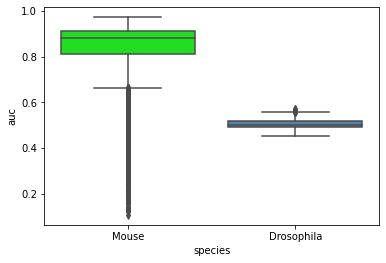

In [630]:
palette ={'Drosophila': 'steelblue', 'Mouse': 'lime'}
sns.boxplot(data=df_struct_conservation_df , x='species', y='auc', palette =palette )
plt.savefig('save_as_a_png.pdf')

In [643]:
map_gene_uni = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/gene_to_uniprot.txt', sep='\t', names=['gene_id', 'uniprot_id'])

map_gene_uni.dropna(inplace=True)

map_gene_uni.drop_duplicates(inplace=True)

gene_age = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/main_HUMAN.csv')

uni_list = gene_age['Unnamed: 0'].tolist()

map_gene_uni = map_gene_uni[map_gene_uni['uniprot_id'].isin(uni_list)]

map_gene_uni = map_gene_uni[map_gene_uni['gene_id'].isin(df_struct_conservation_df['gene_id_jac_sim_x'].tolist())]

map_gene_uni.drop_duplicates(subset='uniprot_id', inplace=True)
map_gene_uni.drop_duplicates(subset='gene_id', inplace=True)

df_con_age = map_gene_uni.merge(gene_age, left_on='uniprot_id', right_on='Unnamed: 0')

In [644]:
df_uni = df_struct_conservation_df.merge(df_con_age, left_on='gene_id_jac_sim_x', right_on='gene_id')
dict_gene_age = {'Cellular_organisms':0, 'Euk_Archaea':1, 'Euk+Bac':2,'Eukaryota':3, 'Opisthokonta':4, 'Eumetazoa':5, 'Vertebrata':6, 'Mammalia':7}
df_uni['disc_age'] = [dict_gene_age[x] for x in df_uni['modeAge']]

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

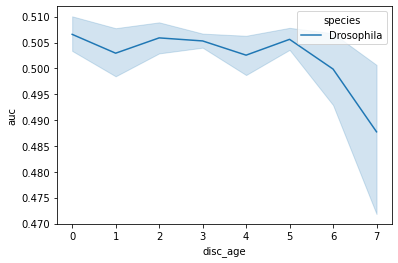

In [649]:
sns.lineplot(data=df_uni[df_uni['species']=='Drosophila'], x='disc_age', y='auc', estimator=np.mean, hue='species')

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

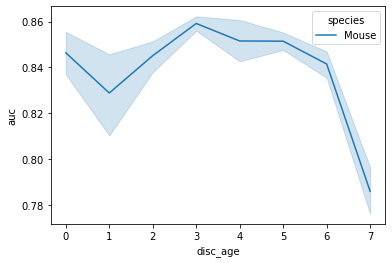

In [648]:
sns.lineplot(data=df_uni[df_uni['species']=='Mouse'], x='disc_age', y='auc', estimator=np.mean, hue='species')

<AxesSubplot:xlabel='disc_age', ylabel='auc'>

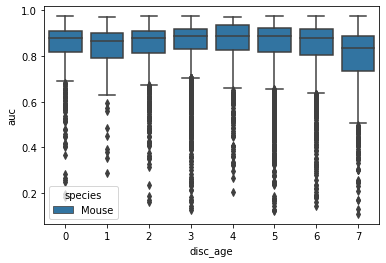

In [651]:
sns.boxplot(data=df_uni[df_uni['species']=='Mouse'], x='disc_age', y='auc', hue='species')

In [386]:
df['auc'] = (df['auc_x'] + df['auc_y'])/2

In [396]:
df['auc'].mean()

0.8465589370446777

In [385]:
df_m_h['auc'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        0.340900
1        0.880627
2        0.837744
3        0.964915
4        0.838294
           ...   
13652    0.811716
13653    0.865729
13654    0.687064
13655    0.901321
13656    0.855057
Name: auc, Length: 13657, dtype: float64>

In [201]:
df['auc'].median(data='df)

0.5043864752286319

In [206]:
df

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file       auc
0     ENSG00000198700          chr1      FBgn0037894          chr3R  0.546047
1     ENSG00000163159          chr1      FBgn0032321          chr2L  0.550604
2     ENSG00000203705          chr1      FBgn0038877          chr3R  0.545863
3     ENSG00000172456          chr1      FBgn0035484          chr3L  0.501473
4     ENSG00000117222          chr1      FBgn0036973          chr3L  0.448760
...               ...           ...              ...            ...       ...
1946  ENSG00000106028          chr7      FBgn0010438          chr3R  0.502173
1947  ENSG00000174231         chr17      FBgn0033688          chr2R  0.509055
1948  ENSG00000088038         chr19      FBgn0033029          chr2R  0.495142
1949  ENSG00000204438          chr6      FBgn0034008          chr2R  0.491338
1950  ENSG00000204569          chr6      FBgn0053526          chr2L  0.494886

[1951 rows x 5 columns]

<AxesSubplot:xlabel='auc', ylabel='Count'>

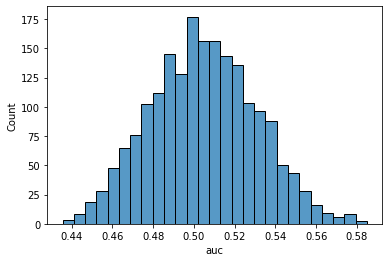

In [203]:
import seaborn as sns
sns.histplot(df['auc'])

In [204]:
gene_age = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/gene_ages/main_HUMAN.csv')

In [205]:
gene_age

Unnamed: 0  Cellular_organisms  Euk_Archaea  Euk+Bac  Eukaryota  \
0      A0A075B6G5                 0.0          0.0      0.0        0.0   
1      A0A075B6R3                 0.0          0.0      0.0        0.0   
2      A0A0A0MR89                 0.0          0.0      0.0        0.0   
3      A0A0A0MS98                 0.0          0.0      0.0        0.0   
4      A0A0A0MSJ3                 0.0          0.0      0.0        1.0   
...           ...                 ...          ...      ...        ...   
20326      Q9Y6Z2                 0.0          0.0      0.0        0.0   
20327      Q9Y6Z5                 0.0          0.0      0.0        0.0   
20328      Q9Y6Z7                 0.0          0.0      0.0        0.0   
20329      Q9YNA8                 0.0          0.0      0.0        0.0   
20330      X6R8D5                 0.0          0.0      0.0        0.0   

       Opisthokonta  Eumetazoa  Vertebrata  Mammalia     modeAge  \
0               0.0   1.000000         0.0  0.000000   Eumetazoa   
1               0.0   0.000000         0.0  1.000000    Mammalia   
2               0.0   1.000000         0.0  0.000000   Eumetazoa   
3               0.0   0.454545         0.0  0.545455    Mammalia   
4               0.0   0.000000         0.0  0.000000   Eukaryota   
...             ...        ...         ...       ...         ...   
20326           0.0   0.000000         0.0  1.000000    Mammalia   
20327           0.0   1.000000         0.0  0.000000   Eumetazoa   
20328           0.0   1.000000         0.0  0.000000   Eumetazoa   
20329           0.0   0.000000         0.2  0.800000    Mammalia   
20330           0.0   0.000000         1.0  0.000000  Vertebrata   

       NumDBsContributing  NumDBsFiltered   entropy      NodeError  \
0                       1               1 -0.000000            6.0   
1                       2               1 -0.000000  10.6666666667   
2                       1               1 -0.000000            1.0   
3                      11               1  0.689009  5.68181818182   
4                       2               0 -0.000000            1.0   
...                   ...             ...       ...            ...   
20326                   9               0 -0.000000            0.0   
20327                   2               1 -0.000000            2.0   
20328                   2              11 -0.000000  3.28205128205   
20329                   5               0  0.500402            1.2   
20330                   9               2 -0.000000  1.96363636364   

       Bimodality  HGT_flag  
0             NaN     False  
1       16.000000     False  
2             NaN     False  
3        1.800000     False  
4             NaN     False  
...           ...       ...  
20326    0.000000     False  
20327    0.000000     False  
20328    0.988095     False  
20329         NaN     False  
20330   -0.360000     False  

[20331 rows x 16 columns]

In [209]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/human.bed', sep='\t', names = ['1', '2', '3', '4'])

In [215]:
df

1                2  3  4
chr1 11868          14409  ENSG00000223972  .  +
     14403          29570  ENSG00000227232  .  -
     17368          17436  ENSG00000278267  .  -
     29553          31109  ENSG00000243485  .  +
     30365          30503  ENSG00000284332  .  +
...                   ...              ... .. ..
chrX 155997580  156010817  ENSG00000124334  .  +
     156004217  156022236  ENSG00000270726  .  +
     156014622  156016837  ENSG00000185203  .  -
     156020825  156025710  ENSG00000182484  .  +
     156025663  156027877  ENSG00000227159  .  -

[57781 rows x 4 columns]

In [214]:
df.groupby(['2'])

In [1024]:
ll = [(1,2),2,3]

In [1025]:
[ll[0] for x in [0,1]]

[(1, 2), (1, 2)]

In [1125]:

df_seq_depth_intra = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_mouse/stats/mouse_exclude_count_intra.txt', sep='\t')


In [1126]:
df_seq_depth_intra = df_seq_depth_intra.groupby(['proj_id'])['counts_intra'].sum().reset_index()

In [1127]:
df_seq_depth_intra

proj_id  counts_intra
0   ERP114475     762705167
1   SRP075985    8702787181
2   SRP096571     428986191
3   SRP100871    2783434393
4   SRP101928   13015571301
5   SRP105082    8184166322
6   SRP107774    4953534112
7   SRP110616     686364200
8   SRP118601    1866665494
9   SRP119332    1591240934
10  SRP131117    2521635601
11  SRP144391     736880049
12  SRP156597    2818865779
13  SRP165933    6074963694
14  SRP179647    1908210349
15  SRP192917    2962573857
16  SRP194410     235140059
17  SRP200567     291428876
18  SRP217487   20638372911
19  SRP218950     163660264
20  SRP223513    3387287100
21  SRP226118    3106880649
22  SRP227097    1483400123
23  SRP229756    2965589299
24  SRP247488    1778576316
25  SRP249897     909271871
26  SRP250878    2485140164
27  SRP252213    1762417022
28  SRP255620    1166853664
29  SRP261290    3212712201
30  SRP268173    2339798566
31  SRP270993    1714817107
32  SRP292639     523143850

In [1128]:
df_seq_depth_inter = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_mouse/stats/mouse_exclude_count_inter.txt', sep='\t')



In [1129]:
df_seq_depth_inter = df_seq_depth_inter.groupby(['proj_id'])['counts_inter'].sum().reset_index()

In [1130]:
df_seq_depth = df_seq_depth_inter.merge(df_seq_depth_intra)

In [1131]:
df_seq_depth['counts'] = df_seq_depth['counts_intra'] + df_seq_depth['counts_inter']

In [810]:
df_list = []
for proj in f1['proj'].tolist():

    df=pd.read_csv(f'{path}/hic_gene_corr_gw_10_percent_per_chr_mouse_{proj}.csv', sep='\t')
    
    
    df['proj_id'] = proj
    df['proj_type'] = 'ind'
    df_list.append(df)
    



In [1113]:

f1=pd.read_csv('/grid/gillis/data/nfox/hi_c_data_processing/data_mouse/stats/project_network_counts.txt', sep=' ', names=['proj', 'count'])
#df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/stats/human_exclude_count_intra.txt', sep='\t')


In [1101]:
df_list = []
for proj in f1['proj'].tolist():
    path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{proj}/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/inter_only'


    df_a=pd.read_csv(f'{path}/hic_gene_corr_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')
    
    path='/grid/gillis/data/lohia/hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/inter_only'
    
    df_b=pd.read_csv(f'{path}/hic_gene_corr_inter_10_percent_per_chr_human_{proj}.csv', sep='\t')
    
    df = df_a.merge(df_b, left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
    
    df['auc'] = (df['auc_x'] + df['auc_y'])/2
    #print ("i")
    
    
    df['proj_id'] = proj
    df['proj_type'] = 'ind'
    df_list.append(df)

FileNotFoundError: [Errno 2] No such file or directory: '/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP130935/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/inter_only/hic_gene_corr_inter_10_percent_per_chr_mouse_aggregates.csv'

In [1169]:
df_list = []
for proj in f1['proj'].tolist():

    
    path='/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/inter_only'
    
    df=pd.read_csv(f'{path}/hic_gene_KR_inter_10_percent_per_chr_mouse_{proj}.csv', sep='\t')
    

    #print ("i")
    
    
    df['proj_id'] = proj
    df['proj_type'] = 'ind'
    df_list.append(df)

FileNotFoundError: [Errno 2] No such file or directory: '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_SRP217487.csv'

In [1170]:
df_auc = pd.concat(df_list)

In [1133]:
df_auc

gene_id_jac_sim chrom_jac_sim    gene_id_exp_file chrom_exp_file  \
0      ENSG00000116218          chr1  ENSMUSG00000026602           chr1   
1      ENSG00000158874          chr1  ENSMUSG00000005681           chr1   
2      ENSG00000143178          chr1  ENSMUSG00000026572           chr1   
3      ENSG00000143207          chr1  ENSMUSG00000040782           chr1   
4      ENSG00000171450          chr2  ENSMUSG00000090071           chr1   
...                ...           ...                 ...            ...   
13652  ENSG00000120256          chr6  ENSMUSG00000019796          chr10   
13653  ENSG00000164930          chr8  ENSMUSG00000022297          chr15   
13654  ENSG00000112212          chr6  ENSMUSG00000023995          chr17   
13655  ENSG00000152242         chr18  ENSMUSG00000047466          chr18   
13656  ENSG00000152240         chr18  ENSMUSG00000041840          chr18   

            auc    proj_id proj_type  
0      0.847230  SRP249897       ind  
1      0.933822  SRP249897       ind  
2      0.849881  SRP249897       ind  
3      0.865787  SRP249897       ind  
4      0.997415  SRP249897       ind  
...         ...        ...       ...  
13652  0.967186  SRP229756       ind  
13653  0.982167  SRP229756       ind  
13654  0.996137  SRP229756       ind  
13655  0.965625  SRP229756       ind  
13656  0.941295  SRP229756       ind  

[259483 rows x 7 columns]

In [1171]:
df =  df_auc.groupby(['proj_id', 'proj_type'])['auc'].median().reset_index().merge(df_seq_depth.groupby(['proj_id'])['counts'].sum().reset_index())



In [1172]:
    path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/inter_only'
    df_all=pd.read_csv(f'{path}/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')
    df_all['proj_id'] = "aggregate"
    df_all['proj_type'] = "aggregate"
    


In [1135]:
    path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/intra_only'
    df_all=pd.read_csv(f'{path}/hic_gene_corr_intra_10_percent_per_chr_mouse_aggregates.csv', sep='\t')
    df_all['proj_id'] = "aggregate"
    df_all['proj_type'] = "aggregate"
    


In [1173]:
df_all = df_all.groupby(['proj_id', 'proj_type'])['auc'].median().reset_index()
df_all['counts'] = df_seq_depth['counts'].sum()
df = pd.concat([df, df_all])

In [1017]:
df.sort_values(by=['log_con'])

KeyError: 'log_con'

<AxesSubplot:xlabel='log_con', ylabel='auc'>

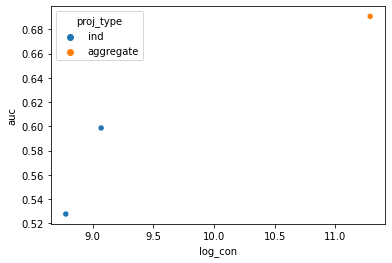

In [1174]:
df['log_con'] = [np.log10(x) for x in df['counts']]
sns.scatterplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

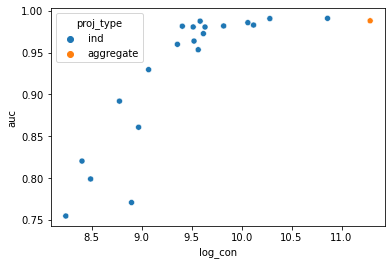

In [1152]:
df['log_con'] = [np.log10(x) for x in df['counts']]
sns.scatterplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

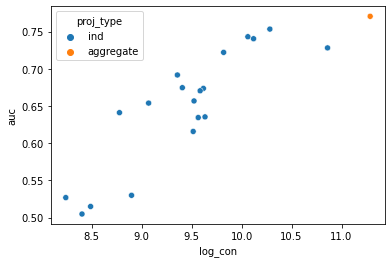

In [1158]:
df['log_con'] = [np.log10(x) for x in df['counts']]
sns.scatterplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='counts', ylabel='auc'>

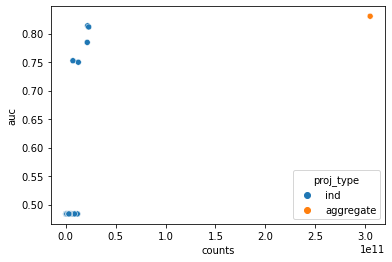

In [1106]:
df['log_con'] = [np.log10(x) for x in df['counts']]
sns.scatterplot(data= df, x='counts', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

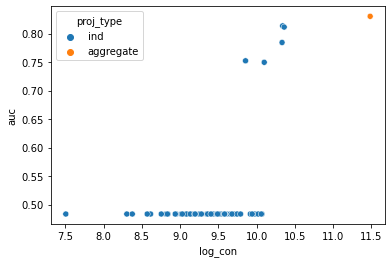

In [1108]:
sns.scatterplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='counts', ylabel='auc'>

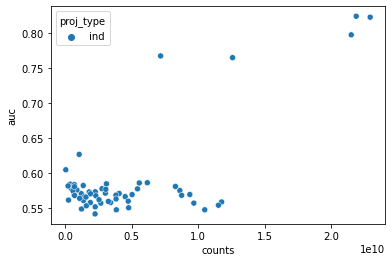

In [1009]:
df['log_con'] = [np.log10(x) for x in df['counts']]
sns.scatterplot(data= df, x='counts', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

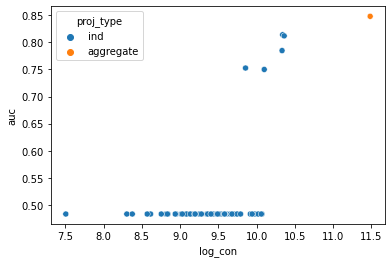

In [933]:
df['log_con'] = [np.log10(x) for x in df['counts']]
sns.scatterplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

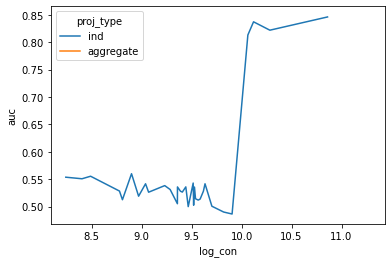

In [895]:
df['log_con'] = [np.log10(x) for x in df['counts']]
sns.lineplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

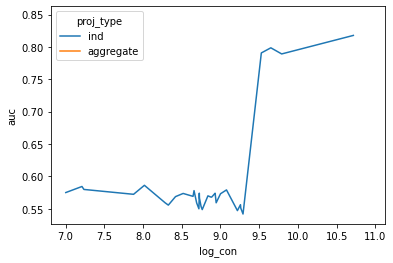

In [860]:
df['log_con'] = [np.log10(x) for x in df['counts_inter']]
sns.lineplot(data= df, x='log_con', y='auc', hue='proj_type' )

In [832]:
df.sort_values(by=['log_con'])

proj_id  proj_type       auc  counts_intra    log_con
19  SRP218950        ind  0.590993     163660264   8.213943
16  SRP194410        ind  0.603992     235140059   8.371327
17  SRP200567        ind  0.607668     291428876   8.464533
2   SRP096571        ind  0.580818     428986191   8.632443
32  SRP292639        ind  0.604459     523143850   8.718621
7   SRP110616        ind  0.608982     686364200   8.836555
11  SRP144391        ind  0.584361     736880049   8.867397
0   ERP114475        ind  0.600471     762705167   8.882357
25  SRP249897        ind  0.599928     909271871   8.958694
28  SRP255620        ind  0.604707    1166853664   9.067016
22  SRP227097        ind  0.601713    1483400123   9.171258
9   SRP119332        ind  0.597714    1591240934   9.201736
31  SRP270993        ind  0.584088    1714817107   9.234218
27  SRP252213        ind  0.606946    1762417022   9.246109
24  SRP247488        ind  0.599872    1778576316   9.250073
8   SRP118601        ind  0.581786    1866665494   9.271066
14  SRP179647        ind  0.589559    1908210349   9.280626
30  SRP268173        ind  0.578794    2339798566   9.369178
26  SRP250878        ind  0.608167    2485140164   9.395351
10  SRP131117        ind  0.609786    2521635601   9.401682
3   SRP100871        ind  0.577328    2783434393   9.444581
12  SRP156597        ind  0.613028    2818865779   9.450074
15  SRP192917        ind  0.588185    2962573857   9.471669
23  SRP229756        ind  0.590336    2965589299   9.472111
21  SRP226118        ind  0.614932    3106880649   9.492325
29  SRP261290        ind  0.584217    3212712201   9.506872
20  SRP223513        ind  0.597776    3387287100   9.529852
6   SRP107774        ind  0.583252    4953534112   9.694915
13  SRP165933        ind  0.571660    6074963694   9.783544
5   SRP105082        ind  0.778711    8184166322   9.912974
1   SRP075985        ind  0.790073    8702787181   9.939658
4   SRP101928        ind  0.775640   13015571301  10.114463
18  SRP217487        ind  0.806928   20638372911  10.314675
0   aggregate  aggregate  0.847234  108163074666  11.034079

<AxesSubplot:xlabel='log_con', ylabel='auc'>

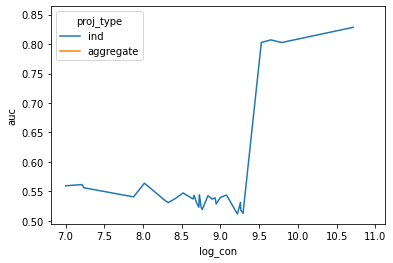

In [792]:
df['log_con'] = [np.log10(x) for x in df['counts_inter']]
sns.lineplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

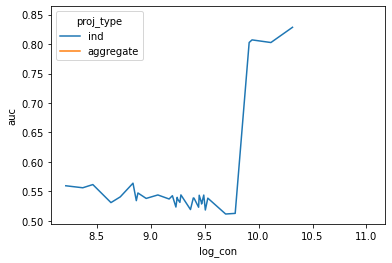

In [818]:
df['log_con'] = [np.log10(x) for x in df['counts_intra']]
sns.lineplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:xlabel='log_con', ylabel='auc'>

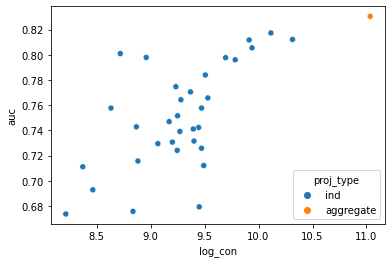

In [716]:
df['log_con'] = [np.log10(x) for x in df['counts_intra']]
sns.scatterplot(data= df, x='log_con', y='auc', hue='proj_type' )

<AxesSubplot:ylabel='auc'>

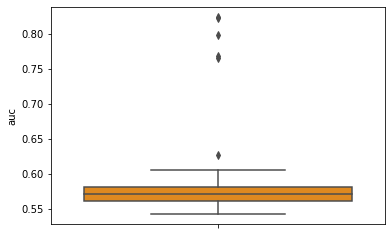

In [1010]:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)
    sns.swarmplot( y='auc', data=df[df['proj_type']=='aggregate'], ax=ax, color="peachpuff", orient="v", size=10)
    sns.boxplot( y='auc', data=df[df['proj_type']=='ind'], ax=ax,  color="darkorange", orient="v")

<AxesSubplot:xlabel='counts_inter', ylabel='auc'>

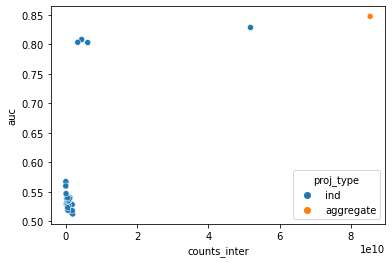

In [697]:
df['log_con'] = [np.log10(x) for x in df['counts_inter']]
sns.scatterplot(data= df, x='counts_inter', y='auc', hue='proj_type')

In [754]:
df

proj_id  proj_type       auc  counts_intra    log_con
0   ERP114475        ind  0.715731     762705167   8.882357
1   SRP075985        ind  0.805515    8702787181   9.939658
2   SRP096571        ind  0.757702     428986191   8.632443
3   SRP100871        ind  0.742310    2783434393   9.444581
4   SRP101928        ind  0.817328   13015571301  10.114463
5   SRP105082        ind  0.811759    8184166322   9.912974
6   SRP107774        ind  0.797732    4953534112   9.694915
7   SRP110616        ind  0.675738     686364200   8.836555
8   SRP118601        ind  0.739146    1866665494   9.271066
9   SRP119332        ind  0.730718    1591240934   9.201736
10  SRP131117        ind  0.731557    2521635601   9.401682
11  SRP144391        ind  0.742837     736880049   8.867397
12  SRP156597        ind  0.679341    2818865779   9.450074
13  SRP165933        ind  0.796073    6074963694   9.783544
14  SRP179647        ind  0.764352    1908210349   9.280626
15  SRP192917        ind  0.725873    2962573857   9.471669
16  SRP194410        ind  0.711134     235140059   8.371327
17  SRP200567        ind  0.692852     291428876   8.464533
18  SRP217487        ind  0.812170   20638372911  10.314675
19  SRP218950        ind  0.673646     163660264   8.213943
20  SRP223513        ind  0.765759    3387287100   9.529852
21  SRP226118        ind  0.712131    3106880649   9.492325
22  SRP227097        ind  0.746970    1483400123   9.171258
23  SRP229756        ind  0.757717    2965589299   9.472111
24  SRP247488        ind  0.751588    1778576316   9.250073
25  SRP249897        ind  0.797893     909271871   8.958694
26  SRP250878        ind  0.741113    2485140164   9.395351
27  SRP252213        ind  0.724154    1762417022   9.246109
28  SRP255620        ind  0.729504    1166853664   9.067016
29  SRP261290        ind  0.783991    3212712201   9.506872
30  SRP268173        ind  0.770564    2339798566   9.369178
31  SRP270993        ind  0.774695    1714817107   9.234218
32  SRP292639        ind  0.800985     523143850   8.718621
0   aggregate  aggregate  0.830529  108163074666  11.034079

In [753]:
sns.scatterplot(data= df, x='counts_inter', y='auc', hue='proj_type')

ValueError: Could not interpret value `counts_inter` for parameter `x`

In [161]:
df=pd.read_csv(f'{path}/hic_gene_corr_gw_10_percent_per_chr_drosophila_aggregates.csv', sep='\t')

In [162]:
df['auc'].median()

0.8752193923391458

In [104]:
df['auc'].median()

0.5384615384615384

/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='auc'>

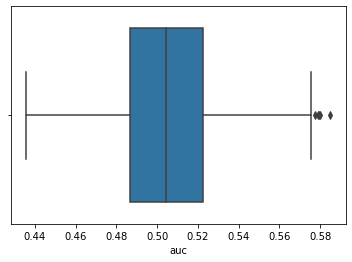

In [146]:
sns.boxplot(df['auc'])

In [94]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/inter_only/hic_gene_corr_gw_1_percent_per_chr.csv', sep='\t')



In [192]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP_58_subset_2/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/intra_only/hic_gene_corr_intra_10_percent_per_chr_mouse_aggregates.csv', sep='\t')


In [193]:
df['auc'].median()

0.7425303366044107

In [88]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/SRP_58_subset_2/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked/intra_only/hic_gene_corr_intra_1_percent_per_chr.csv', sep='\t')



In [89]:
df['auc'].median()

0.6838818504827191